In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
pip install textatistic

     |████████████████████████████████| 40 kB 3.8 MB/s 
     |████████████████████████████████| 63 kB 573 kB/s 
  Created wheel for textatistic: filename=textatistic-0.0.1-py3-none-any.whl size=29068 sha256=88dced17f0f8faa470d77a60d1af9e9ba7c1e0122ee30b543bd25b2bd4a48d88
  Stored in directory: /root/.cache/pip/wheels/58/4a/1a/5ed2a089cbd2f98693b07221c4ab499c8c446e15b6123ba4a4
  Created wheel for pyhyphen: filename=PyHyphen-4.0.3-cp37-abi3-linux_x86_64.whl size=60307 sha256=0015de9a86d88c9ecfc2cb979f93be4187bd60ebd5fe9650f9887c549f7d26e1
  Stored in directory: /root/.cache/pip/wheels/4e/21/3e/e883a6e9969fdd074763213ddaeee0e781c359bbfda3fa435f
Successfully built textatistic pyhyphen
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the foll

In [ ]:
import os
import pandas as pd
import spacy
from spacy import displacy
import nltk
from nltk.tokenize import word_tokenize
from google.colab import drive
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
#from textatistic import Textatistic
from spacy.matcher import Matcher
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
imdb_dir = '/content/gdrive/MyDrive'
dataset_dir = os.path.join(imdb_dir, 'Textify.ai/Textify AI Text Corpus Center (Responses).xlsx')
#dataset_dir = os.path.join(imdb_dir, 'Textify.ai/training_set_rel3.xls')
#print(dataset_dir)
#bad_essays = os.path.join(imdb_dir,'Textify.ai/First Draft Essays.xlsx')

In [ ]:
df = pd.read_excel(dataset_dir)
#df_bad = pd.read_excel(bad_essays)

In [ ]:
#df.shape,df_bad.shape

In [ ]:
df.head()

,Timestamp,Contributor,Topic,Writing Style,Essay Text,Essay Grading,University Name,Education Program,Relevant Field (Major/ Subject of study etc),Reference Link,Comments (is something unusual about the essay?)
0,2021-06-20 05:36:05.410,Tin,Bacon,Narrative,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C),Duke University,Bachelors,NaN,http://www.qianmu.org/u/lystu/school/file/0hme...,NaN
1,2021-06-20 05:47:07.236,Tin,“Beyond Plug-and-Chug Math”,Persuasive,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C),MIT - Massachusetts Institute of Technology,Bachelors,Mathematics,http://www.qianmu.org/u/lystu/school/file/0hme...,NaN
2,2021-06-20 06:00:53.430,Tin,“A Different Kind of love”,"Narrative, Personal","WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+),Stanford University,Bachelors,Spanish Language,http://www.qianmu.org/u/lystu/school/file/0hme...,NaN
3,2021-06-20 06:12:52.684,Tin,“From Flaubert to Frisbee”,Persuasive,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C),Brown University,Masters,Literature,http://www.qianmu.org/u/lystu/school/file/0hme...,NaN
4,2021-06-20 06:20:05.473,Tin,Raising the Bar,Narrative,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C),NaN,Masters,Engineering and Sciences,http://www.qianmu.org/u/lystu/school/file/0hme...,NaN


In [ ]:
#df_bad.head()

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
#df_essays_recovery = df_essays.copy()
df_essays = df[['Essay Text','Essay Grading']]
df_essays['Essay Grading'].value_counts()

Average (B-C)     401
Excellent (A+)    288
Bad (D-F)          45
Name: Essay Grading, dtype: int64

In [ ]:
#df_bad.rename(columns={'Essay_Text':'Essay Text','Grade':'Essay Grading'},inplace=True)

In [ ]:
#df_essays = pd.concat([df_initial,df_bad])
#df_essays = df.copy()

In [ ]:
df_essays.head()

,Essay Text,Essay Grading
0,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C)
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C)
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+)
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C)
4,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C)


In [ ]:
df_essays.dtypes

Essay Text       object
Essay Grading    object
dtype: object

In [ ]:
df_essays['Essay Grading'].value_counts()

Average (B-C)     401
Excellent (A+)    288
Bad (D-F)          45
Name: Essay Grading, dtype: int64

# **FEATURE EXTRACTION FROM ESSAY'S ASCII TEST**

## **COUNTING SENTENCES**

In [ ]:
def count_sentences(essay):
  doc = nlp(essay)
  doc_sents = [sent for sent in doc.sents]
  return len(doc_sents)
  
  # return len(list(doc.sents))


In [ ]:
str1 = '“I wanna go home!” I say as I sit on the kitchen floor watching my mother cook. “What do you mean?” she asks, giving me a questioning look. “Ethiopia?” “I don’t know.” Home. For most people, the word can be easily defined as the place where they grew up or live now. By that definition, the house in which I have lived for the past seven years would be my home. The problem is, I often find myself saying, “I wanna go home,” while sitting in that very house. The other candidate is the place where I grew up, but that could be either of two places: my home country of Ethiopia or my adopted hometown of Westbrook, Maine. I cannot choose one over the other. For better or for worse, each has shaped the person I am today more than can be expressed in words. Ethiopia is the place where I experienced so many of my “firsts.” Maine is the place where I developed my individuality. At the same time, neither can truly be my home. Though Ethiopia was my home at one point, it is no longer the same place I knew as a child because I am no longer that child. I can no longer relate to the culture the way I once did. As my sister often tells me, I have become “Americanized.” On the other hand, I have never felt at home in Maine. The first memory I have of Maine is my first day visiting Reiche Elementary, the school I would be attending. I stood in front of a group of seven- and eight-year-old boys and girls. Every face was pointed at me, every pair of eyes wide and expectant. I grabbed the fabric of my mother’s skirt and buried my face into the side of her leg. These children were all so different. Every child had a skin color different from mine. Though I picked out a few familiar words, I could not understand what they were saying. I knew I didn’t belong there, but there was no chance of hopping on a plane and going back to Ethiopia. I knew that, and the thought terrified me. I had never felt as uncomfortable and uncertain as I did that day. That day has stayed with me, along with the discomfort and uncertainty. Though the intensity of those feelings has faded, it has not gone away, and it is not likely to leave me soon. I cannot deny, however, that the environment Maine has provided has shaped me profoundly. Living in Maine has made me who I am today just as much as being born and raised in Ethiopia. Ethiopia gave me my cultural and family identity. Ethiopia is the place that comes to mind when I think of my family, since my entire extended family remains there. It is also the place that comes to mind when I think of my motivation, since I was raised in a culture that taught me to give one hundred percent at all times. Yet, the fact remains that I have lived in Maine for nearly ten years of my life. This environment has influenced me more than even I can comprehend. So, the question becomes: which of these places (if either) should I consider my home? In all honesty, I cannot choose one physical place and give it the title of “home.” Instead, I elect to compose my own definition of home, a definition that does not force me to choose between the two places in which I grew up. My definition allows me to think of home as a place in my mind, a state of mind that enables me to remember my childhood years in Ethiopia and the opportunities given to me by living in the U.S. It has taken a long time to define what home means to me — and even longer to find it — but doing so has given me an amazing sense of hope and comfort. In my mind, it is a place where I can escape. It is a place from which I draw strength when life gets too hectic or when I am faced with challenges that seem too great to overcome. It is what I really mean — what I have always meant — when I say that I want to go home.'
count_sentences(str1)

48

In [ ]:
df_essays['SentenceCount'] = df_essays['Essay Text'].apply(count_sentences)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_essays[:10]

,Essay Text,Essay Grading,SentenceCount
0,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C),35
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C),28
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+),40
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C),20
4,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C),23
5,"My eyes widen. “It’s all Greek to me,” I whisp...",Excellent (A+),46
6,"I could still hear her words, the words my tea...",Average (B-C),31
7,It was a wet and dreary October evening. I sho...,Average (B-C),30
8,"Oreos. On the exterior, a firm chocolate crust...",Average (B-C),43
9,"Whether I was blowing out candles, writing a l...",Average (B-C),21


In [ ]:
df_essays.iloc[700].values[0]

'“Jooooorrrrddddannnnn,” my mom screamed with utter fear and panic in her voice. Surprisingly, amongst all of the chaos, her voice was all that I heard. I’m not sure if I was disoriented, bewildered or just in complete shock but at that particular moment, I felt nothing. That feeling of nothingness lasted 2.5 seconds because then the excruciating pain began. My knee felt as if someone had hit me with a Mack truck going 90 miles per hour. For the first time in my life, I had experienced real pain. I was 10 years old and I shattered my knee.\nI have always been a well rounded student. My focus has always been on my school and everything that comes along with it, which included extra-curricular activities. I was an avid gymnast. I had been in gymnastics since I was 3 years old. My parents were both extremely athletic. My dad was an All-American college football player and my mom was a cheerleader, so it was only fitting that I participated in something athletically strenuous as well. They

## **COUNTING WORDS w/o STOP WORDS**

In [ ]:
#nltk.download('stopwords')

In [ ]:
#nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# word_tokens = word_tokenize(df_essays.iloc[729].values[0])
# stop_words = set(stopwords.words('english'))

In [ ]:
# def count_non_stop_words(essay):
#   word_tokens = word_tokenize(essay)
#   filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#   return len(filtered_sentence)
# def count_non_stop_words(essay):
#   word_tokens = word_tokenize(essay)
#   filtered_sentence = [w for w in word_tokens]
#   return len(filtered_sentence)
def count_all_words(essay):
  doc = nlp(essay)
  return(len(doc))
  # filtered_sentence = []
  # for tok in doc:
  #   if tok.is_stop == False:
  #     filtered_sentence.append(tok)
  # print(filtered_sentence)
  # return len(filtered_sentence)

In [ ]:
str1 = '“I wanna go home!” I say as I sit on the kitchen floor watching my mother cook. “What do you mean?” she asks, giving me a questioning look. “Ethiopia?” “I don’t know.” Home. For most people, the word can be easily defined as the place where they grew up or live now. By that definition, the house in which I have lived for the past seven years would be my home. The problem is, I often find myself saying, “I wanna go home,” while sitting in that very house. The other candidate is the place where I grew up, but that could be either of two places: my home country of Ethiopia or my adopted hometown of Westbrook, Maine. I cannot choose one over the other. For better or for worse, each has shaped the person I am today more than can be expressed in words. Ethiopia is the place where I experienced so many of my “firsts.” Maine is the place where I developed my individuality. At the same time, neither can truly be my home. Though Ethiopia was my home at one point, it is no longer the same place I knew as a child because I am no longer that child. I can no longer relate to the culture the way I once did. As my sister often tells me, I have become “Americanized.” On the other hand, I have never felt at home in Maine. The first memory I have of Maine is my first day visiting Reiche Elementary, the school I would be attending. I stood in front of a group of seven- and eight-year-old boys and girls. Every face was pointed at me, every pair of eyes wide and expectant. I grabbed the fabric of my mother’s skirt and buried my face into the side of her leg. These children were all so different. Every child had a skin color different from mine. Though I picked out a few familiar words, I could not understand what they were saying. I knew I didn’t belong there, but there was no chance of hopping on a plane and going back to Ethiopia. I knew that, and the thought terrified me. I had never felt as uncomfortable and uncertain as I did that day. That day has stayed with me, along with the discomfort and uncertainty. Though the intensity of those feelings has faded, it has not gone away, and it is not likely to leave me soon. I cannot deny, however, that the environment Maine has provided has shaped me profoundly. Living in Maine has made me who I am today just as much as being born and raised in Ethiopia. Ethiopia gave me my cultural and family identity. Ethiopia is the place that comes to mind when I think of my family, since my entire extended family remains there. It is also the place that comes to mind when I think of my motivation, since I was raised in a culture that taught me to give one hundred percent at all times. Yet, the fact remains that I have lived in Maine for nearly ten years of my life. This environment has influenced me more than even I can comprehend. So, the question becomes: which of these places (if either) should I consider my home? In all honesty, I cannot choose one physical place and give it the title of “home.” Instead, I elect to compose my own definition of home, a definition that does not force me to choose between the two places in which I grew up. My definition allows me to think of home as a place in my mind, a state of mind that enables me to remember my childhood years in Ethiopia and the opportunities given to me by living in the U.S. It has taken a long time to define what home means to me — and even longer to find it — but doing so has given me an amazing sense of hope and comfort. In my mind, it is a place where I can escape. It is a place from which I draw strength when life gets too hectic or when I am faced with challenges that seem too great to overcome. It is what I really mean — what I have always meant — when I say that I want to go home.'
count_all_words(str1)

835

In [ ]:
df_essays['WordCount'] = df_essays['Essay Text'].apply(count_all_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_essays.head()

,Essay Text,Essay Grading,SentenceCount,WordCount
0,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C),35,816
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C),28,587
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+),40,1005
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C),20,571
4,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C),23,549


In [ ]:
#df_essays_mini = df_essays[:1]

## **COUNTING PARTS OF SPEECH**

https://stackabuse.com/python-for-nlp-parts-of-speech-tagging-and-named-entity-recognition/

In [ ]:
def count_feature(postag,essay,wordcount,roundval):
  doc=nlp(essay)
  pos_counts = doc.count_by(spacy.attrs.POS)
  for k,v in sorted(pos_counts.items()):
    if doc.vocab[k] == postag:
      return round(v/wordcount,roundval)

# def count_verb(essay,wordcount):
#   doc=nlp(essay)
#   pos_counts = doc.count_by(spacy.attrs.POS)
#   for k,v in sorted(pos_counts.items()):
#     if doc.vocab[k] == 'VERB':
#       return round(v/wordcount,0)

# def count_noun(essay,wordcount):
#   doc=nlp(essay)
#   pos_counts = doc.count_by(spacy.attrs.POS)
#   for k,v in sorted(pos_counts.items()):
#     if doc.vocab[k] == 'NOUN':
#       return round(v/wordcount,0)

# def count_adjective(essay,wordcount):
#   doc=nlp(essay)
#   pos_counts = doc.count_by(spacy.attrs.POS)
#   for k,v in sorted(pos_counts.items()):
#     if doc.vocab[k] == 'ADJ':
#       return round(v/wordcount,0)

# def count_adverb(essay,wordcount):
#   doc=nlp(essay)
#   pos_counts = doc.count_by(spacy.attrs.POS)
#   for k,v in sorted(pos_counts.items()):
#     if doc.vocab[k] == 'ADV':
#       return round(v/wordcount,0)    

# def count_pronoun(essay,wordcount):
#   doc=nlp(essay)
#   pos_counts = doc.count_by(spacy.attrs.POS)
#   for k,v in sorted(pos_counts.items()):
#     if doc.vocab[k] == 'PRON':
#       return round(v/wordcount,0)

# def count_punctuations(essay,wordcount):
#   doc=nlp(essay)
#   pos_counts = doc.count_by(spacy.attrs.POS)
#   for k,v in sorted(pos_counts.items()):
#     if doc.vocab[k] == 'PUNCT':
#       return round(v/wordcount,0)                        

In [ ]:
# df_essays['VerbCount']  = df_essays.apply(lambda x: count_feature('VERB',x['Essay Text'], 1,0), axis=1)
# df_essays['NounCount']  = df_essays.apply(lambda x: count_feature('NOUN',x['Essay Text'], 1,0), axis=1)
# df_essays['AdjCount']  = df_essays.apply(lambda x: count_feature('ADJ',x['Essay Text'], 1,0), axis=1)
# df_essays['AdverbCount']  = df_essays.apply(lambda x: count_feature('ADV',x['Essay Text'], 1,0), axis=1)
# df_essays['PronounCount']  = df_essays.apply(lambda x: count_feature('PRON',x['Essay Text'], 1,0), axis=1)
# df_essays['PunctCount']  = df_essays.apply(lambda x: count_feature('PUNCT',x['Essay Text'], 1,0), axis=1)

In [ ]:
# df_essays.hist(figsize=(10,10))

# Day 2

# **Normalizing the grades distribution by Feature Counts**

In [ ]:
# def display_stack_bar(col1,col2,title,xlabel,buffer,binsize):
#   df_new = pd.DataFrame()
#   bins_created = np.arange(min(df_essays[col1])-buffer, max(df_essays[col1]) + buffer, binsize) 
#   df_essays[col2] = pd.cut(df_essays[col1], bins=bins_created)
#   df_essays.sort_values(by = col1,inplace=True)
#   counts = df_essays.groupby([col2,'Essay Grading'],sort=False).SentenceCount.count().unstack()
#   df_essays.drop([col2], axis=1,inplace=True)
#   counts.replace(np.nan,0,inplace=True)
#   counts["sum"] = counts.sum(axis=1)
#   df_new['Average (B-C)'] = counts['Average (B-C)']/counts['sum']
#   df_new['Excellent (A+)'] = counts['Excellent (A+)']/counts['sum']
#   df_new['Bad (D-F)'] = counts['Bad (D-F)']/counts['sum']
#   ax = df_new.plot.bar(stacked=True,figsize=(10,10),width = 0.5)
#   for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
#             round(height,2), 
#             horizontalalignment='center', 
#             verticalalignment='center')  
#   plt.title(title,fontsize=18)
#   plt.xlabel(xlabel,fontsize=18)
#   plt.xticks(fontsize=14,rotation=45)
#   plt.ylabel('Number of Entries',fontsize=18)
#   plt.show()	

# display_stack_bar('SentenceCount','SentenceCountCategory','Sentence Count for Different Grades','Sentence Counts',4,20)
# display_stack_bar('WordCount','WordCountCategory','Word Count for Different Grades','Word Counts',30,100)
# display_stack_bar('VerbCount','VerbCountCategory','Verb Count for Different Grades','Verb Counts',10,30)
# display_stack_bar('NounCount','NounCountCategory','Noun Count for Different Grades','Noun Counts',10,50)
# display_stack_bar('AdjCount','AdjectivesCountCategory','Adjectives Count for Different Grades','Adjective Counts',5,20)
# display_stack_bar('AdverbCount','AdverbCountCategory','Adverb Count for Different Grades','Adverb Counts',2,10)
# display_stack_bar('PronounCount','PronounCountCategory','Pronoun Count for Different Grades','Pronoun Counts',1,30)
# display_stack_bar('PunctCount','PunctCountCategory','Punctuations Count for Different Grades','Punctuations Counts',10,25)

# **Calculating VERB/NOUN/ADJ.... density**

In [ ]:
df_essays.tail()

,Essay Text,Essay Grading,SentenceCount,WordCount
729,As a Chemistry student in Singapore Polytechni...,Average (B-C),14,328
730,"At age 6, I remember the light filled openness...",Excellent (A+),44,746
731,"When it comes to service workers, as a society...",Excellent (A+),34,683
732,The most exciting part was the laptop.\nMy mom...,Excellent (A+),33,769
733,I live on the edge.\nI live at the place where...,Excellent (A+),42,559


In [ ]:
df_essays['VerbCount']  = df_essays.apply(lambda x: count_feature('VERB',x['Essay Text'], x['WordCount'],2), axis=1)
df_essays['NounCount']  = df_essays.apply(lambda x: count_feature('NOUN',x['Essay Text'], x['WordCount'],2), axis=1)
df_essays['AdjCount']  = df_essays.apply(lambda x: count_feature('ADJ',x['Essay Text'], x['WordCount'],2), axis=1)
df_essays['AdverbCount']  = df_essays.apply(lambda x: count_feature('ADV',x['Essay Text'], x['WordCount'],2), axis=1)
df_essays['PronounCount']  = df_essays.apply(lambda x: count_feature('PRON',x['Essay Text'], x['WordCount'],2), axis=1)
df_essays['PunctCount']  = df_essays.apply(lambda x: count_feature('PUNCT',x['Essay Text'], x['WordCount'],2), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_essays.tail()

,Essay Text,Essay Grading,SentenceCount,WordCount,VerbCount,NounCount,AdjCount,AdverbCount,PronounCount,PunctCount
729,As a Chemistry student in Singapore Polytechni...,Average (B-C),14,335,0.14,0.17,0.05,0.05,0.07,0.10
730,"At age 6, I remember the light filled openness...",Excellent (A+),44,749,0.13,0.21,0.04,0.04,0.07,0.11
731,"When it comes to service workers, as a society...",Excellent (A+),34,700,0.13,0.24,0.06,0.05,0.06,0.11
732,The most exciting part was the laptop.\nMy mom...,Excellent (A+),33,785,0.11,0.19,0.09,0.05,0.07,0.12
733,I live on the edge.\nI live at the place where...,Excellent (A+),42,567,0.11,0.26,0.04,0.03,0.07,0.11


# **Let's visualize the dataset for normalization (w/o normalization)**

[  0  20  40  60  80 100]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=err

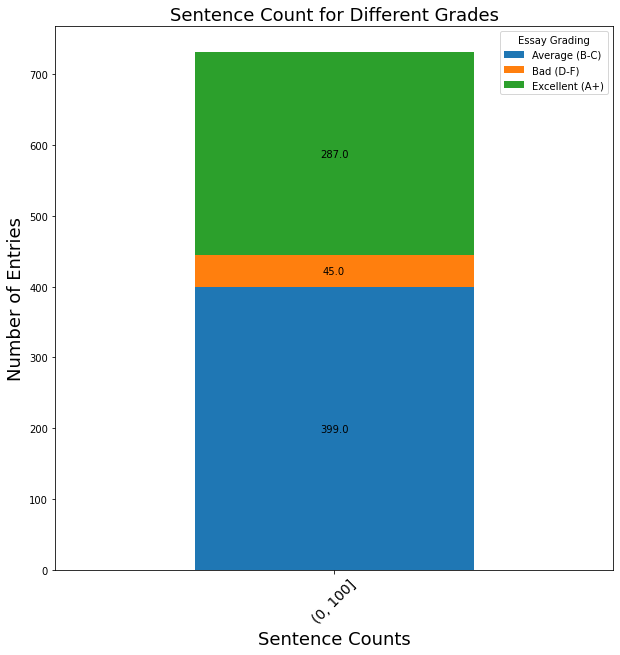

In [ ]:
def display_stack_bar(col1,col2,title,xlabel,buffer,binsize):
  bins_created = np.arange(min(df_essays[col1])-buffer, max(df_essays[col1]) + buffer, binsize) 
  print(bins_created)
  bins_created = [0,100]
  df_essays[col2] = pd.cut(df_essays[col1], bins=bins_created)
  df_essays.sort_values(by = col1,inplace=True)
  counts = df_essays.groupby([col2,'Essay Grading'],sort=False).SentenceCount.count().unstack()
  df_essays.drop([col2], axis=1,inplace=True)
  counts.replace(np.nan,0,inplace=True)
  ax = counts.plot.bar(stacked=True,figsize=(10,10),width = 0.5)
  for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            round(height,2), 
            horizontalalignment='center', 
            verticalalignment='center')  
  plt.title(title,fontsize=18)
  plt.xlabel(xlabel,fontsize=18)
  plt.xticks(fontsize=14,rotation=45)
  plt.ylabel('Number of Entries',fontsize=18)
  plt.show()	

display_stack_bar('SentenceCount','SentenceCountCategory','Sentence Count for Different Grades','Sentence Counts',4,20)
# display_stack_bar('WordCount','WordCountCategory','Word Count for Different Grades','Word Counts',30,100)
# display_stack_bar('VerbCount','VerbCountCategory','Verb Count for Different Grades','Verb Counts',0,.05)
# # display_stack_bar('NounCount','NounCountCategory','Noun Count for Different Grades','Noun Counts',10,50)
# display_stack_bar('AdjCount','AdjectivesCountCategory','Adjectives Count for Different Grades','Adjective Counts',5,20)
# display_stack_bar('AdverbCount','AdverbCountCategory','Adverb Count for Different Grades','Adverb Counts',2,10)
# display_stack_bar('PronounCount','PronounCountCategory','Pronoun Count for Different Grades','Pronoun Counts',1,30)
# display_stack_bar('PunctCount','PunctCountCategory','Punctuations Count for Different Grades','Punctuations Counts',10,25)

# **Scatter Plot**

In [ ]:
# dict  = {2:'Excellent (A+)',1:'Average (B-C)',0:'Bad (D-F)'}
# # Split the data into features and target label

# df_essays_copy = df_essays.copy()

# df_essays_copy['Essay Grading'] = df_essays_copy['Essay Grading'].apply(lambda x:2 if x=="Excellent (A+)" else 1 if x=='Average (B-C)' else 0)
# df_essays_copy.drop(['Essay Text'], axis = 1,inplace=True,errors='ignore')
# data = np.asarray(df_essays_copy)

In [ ]:
# X = data[:,0:2] # SentenceCount WordCount
# y = data[:,-1]

# plt.figure(figsize=(8, 8), dpi=80)
# plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k',label=dict[0])
# plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k',label=dict[1])
# plt.scatter(X[np.argwhere(y==2).flatten(),0], X[np.argwhere(y==2).flatten(),1],s = 50, color = 'yellow', edgecolor = 'k',label=dict[2])
# plt.xlabel('SentenceCount')
# plt.ylabel('WordCount')
# plt.legend()
# plt.show()

In [ ]:
# X = data[:,6:8] # PronounCount PunctCount
# y = data[:,-1]

# plt.figure(figsize=(8, 8), dpi=80)
# plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k',label=dict[0])
# plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k',label=dict[1])
# plt.scatter(X[np.argwhere(y==2).flatten(),0], X[np.argwhere(y==2).flatten(),1],s = 50, color = 'yellow', edgecolor = 'k',label=dict[2])
# plt.xlabel('PronounCount')
# plt.ylabel('PunctuationCount')
# plt.legend()
# plt.show()

In [ ]:
# X = data[:,4:6] # Adjective AdverbCount
# y = data[:,-1]

# plt.figure(figsize=(8, 8), dpi=80)
# plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k',label=dict[0])
# plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k',label=dict[1])
# plt.scatter(X[np.argwhere(y==2).flatten(),0], X[np.argwhere(y==2).flatten(),1],s = 50, color = 'yellow', edgecolor = 'k',label=dict[2])
# plt.xlabel('AdjectiveCount')
# plt.ylabel('AdverbCount')
# plt.legend()
# plt.show()


In [ ]:
# X = data[:,2:4] # VerbCount NounCount
# y = data[:,-1]

# plt.figure(figsize=(8, 8), dpi=80)
# plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k',label=dict[0])
# plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k',label=dict[1])
# plt.scatter(X[np.argwhere(y==2).flatten(),0], X[np.argwhere(y==2).flatten(),1],s = 50, color = 'yellow', edgecolor = 'k',label=dict[2])
# plt.xlabel('VerbCount')
# plt.ylabel('NounCount')
# plt.legend()
# plt.show()

# **ROUGH WORK START**

In [ ]:
df_essays.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df_essays.isnull().sum()

Essay Text       0
Essay Grading    0
SentenceCount    0
WordCount        0
VerbCount        0
NounCount        0
AdjCount         0
AdverbCount      0
PronounCount     0
PunctCount       0
dtype: int64

In [ ]:
df_essays.dropna(inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_essays.isnull().sum()

Essay Text       0
Essay Grading    0
SentenceCount    0
WordCount        0
VerbCount        0
NounCount        0
AdjCount         0
AdverbCount      0
PronounCount     0
PunctCount       0
dtype: int64

In [ ]:
df_essays.head()

,Essay Text,Essay Grading,SentenceCount,WordCount,VerbCount,NounCount,AdjCount,AdverbCount,PronounCount,PunctCount
0,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C),35,798,0.13,0.18,0.09,0.06,0.06,0.13
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C),28,588,0.13,0.19,0.08,0.05,0.08,0.09
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+),40,994,0.11,0.15,0.08,0.05,0.08,0.11
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C),20,560,0.12,0.16,0.07,0.07,0.08,0.11
4,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C),23,544,0.10,0.20,0.06,0.05,0.05,0.12


# **ROUGH WORK END**

# **Active/Passive Voice Feature**

In [ ]:
matcher = Matcher(nlp.vocab)

# function to check the type of sentence
# def checkForSentType(inputEssay):  
#     # running the model on sentence
#     doc = nlp(inputEssay)
#     sents = list(doc.sents)

#     passive_rule = [{'DEP':'nsubjpass'},{'DEP':'aux','OP':'*'},{'DEP':'auxpass'},{'TAG':'VBN'}]
#     matcher.add('Passive',None,passive_rule)
#     matches = matcher(doc)
#     #return (len(matches)/len(sents),(len(sents)-len(matches))/len(sents))
#     return ((len(sents)-len(matches))/len(sents))
def check_passive_voice(inputEssay):
  # # running the model on sentence
  doc = nlp(inputEssay)
  dep_list = []
  passive_list = []
  sents = list(doc.sents)

  for sents in doc.sents:
    dep_list = []
    for token in sents:# Tokenize the sentence into words/tokens
      #print(token.text, token.pos_, token.dep_)  # form a list of various syntactic dependencies  
      dep_list.append(token.dep_)

    if ('nsubjpass') in dep_list or ('auxpass') in dep_list:
      passive_list.append(sents)

  return (round((len(sents)-len(passive_list))/len(sents),2)) # returning active voice sentences density

def check_passive_voice_new(inputEssay): # Not used
  passive_dict = {}
  # # running the model on sentence
  doc = nlp(inputEssay.EssayText)
  dep_list = []
  passive_list = []
  passive_dict_inner = {}

  passive_rule2 = [{'DEP': 'auxpass'}]
  matcher.add('Passive2',[passive_rule2])

  for sents in doc.sents:
    dep_list = []
    offset_list = []
    for token in sents:# Tokenize the sentence into words/tokens
      #print(token.text, token.pos_, token.dep_)  # form a list of various syntactic dependencies  
      dep_list.append(token.dep_)

    if ('nsubjpass') in dep_list or ('auxpass') in dep_list:
      passive_dict_inner["startIndex"] = sents.start_char
      passive_dict_inner["endIndex"]   = sents.end_char
      passive_dict_inner["text"]       = sents.text 

      # # running the model on sentence
      doc_sent = nlp(sents.text)
      #print(doc_sent)
      found_matches = matcher(doc_sent)
      #print(found_matches)
      for match_id, start, end in found_matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc_sent[start:end+1]                    # get the matched span
        #print(span)
        offset_list.extend((match.start(),match.end()+1) for match in re.finditer(str(span), doc.text.lower())) # need to be done at whole document level and not sentence level to get offset from 1.
      
      passive_dict_inner["characteroffset"] = offset_list
      passive_list.append(passive_dict_inner.copy())      
      #passive_list.append(dict(text = sents,startIndex = sents.start_char,endIndex = sents.end_char))

  passive_dict = dict(color = "#FFA500", description = "Passive voice",passive_voice = passive_list)
  return (passive_dict)

#df_essays[['NumberofPassiveVoice','NumberofActiveVoice']] = df_essays.apply(lambda row: pd.Series(checkForSentType(row['Essay Text'])),axis=1) 
df_essays['NumberofActiveVoice'] = df_essays.apply(lambda row: pd.Series(check_passive_voice(row['Essay Text'])),axis=1) 

df_essays.reset_index(drop=True,inplace=True)

# **Complex, Compound Complex,Compound,Simple sentences Feature**

In [ ]:
def getCountTypeSent_old(essay_text):
  complex_comp_list=[]
  complex_list=[]
  compound_list=[]
  simple_list=[]
  dep_list = []
  docu = nlp(essay_text)
  num_sent = len([sent for sent in docu.sents]) # Counting the number of sentences

  for sents in docu.sents:
    for token in sents:# Tokenize the sentence into words/tokens
      #subtree argument gives the subtree of the token when parsed in dependency parsing.
      subtree = token.subtree
      #Looking at the ancestors of a token can tell us how deep it is
      k = list(token.ancestors)
      #we need to add this to make the indexing work properly
      k.append('added_to_get_proper_indexing')
      #k=2 gives us the first level of the tree, k=3 will give us the next level.
      if(len(k)==2):
        #print([(t.text) for t in subtree], token.dep_)
        dep_list.append(token.dep_)
      #we missed the root phrase in the previous 
      if(token.dep_=='ROOT'):
        k =[token.text]
      #print(k, 'root')

    #complex sentences have (advcl) in their dependency tree
    #compound sentences have (cc)-> coordination and (conj)-> conjuction in their dependency tree
    #compound complex sentences have both the above
    #simple sentences have neither.
    if ('advcl') in dep_list and ('cc') in dep_list and ('conj') in dep_list:
      complex_comp_list.append('Complex-compound sentence')
    elif ('advcl') in dep_list:
      complex_list.append('Complex sentence')
    elif ('cc') in dep_list and ('conj') in dep_list:
      compound_list.append('Compound sentence')
    else:
      simple_list.append('Simple sentence')
  return (len(complex_comp_list)/num_sent,len(complex_list)/num_sent,len(compound_list)/num_sent,len(simple_list)/num_sent)
  

###### New functionality

# Sentence type functionality start
SUBJECTS = ["nsubj", "nsubjpass", "csubj", "csubjpass", "agent", "expl"]
OBJECTS = ["dobj", "dative", "attr", "oprd"]

def getSubsFromConjunctions(subs):
    moreSubs = []
    for sub in subs:
        # rights is a generator
        rights = list(sub.rights)
        #print(rights)
        rightDeps = {tok.lower_ for tok in rights}
        if "and" in rightDeps:
            moreSubs.extend([tok for tok in rights if tok.dep_ in SUBJECTS or tok.pos_ == "NOUN"])
            if len(moreSubs) > 0:
                moreSubs.extend(getSubsFromConjunctions(moreSubs))
    return moreSubs

def findSubs(tok):
    head = tok.head
    while head.pos_ != "VERB" and head.pos_ != "NOUN" and head.head != head:
        head = head.head
    if head.pos_ == "VERB":
        subs = [tok for tok in head.lefts if tok.dep_ == "SUB"]
        if len(subs) > 0:
            verbNegated = isNegated(head)
            subs.extend(getSubsFromConjunctions(subs))
            return subs, verbNegated
        elif head.head != head:
            return findSubs(head)
    elif head.pos_ == "NOUN":
        return [head], isNegated(tok)
    return [], False

def isNegated(tok):
    negations = {"no", "not", "n't", "never", "none"}
    for dep in list(tok.lefts) + list(tok.rights):
        if dep.lower_ in negations:
            return True
    return False

def findSVs(tokens):
    svs = []
    verbs = [tok for tok in tokens if tok.pos_ == "VERB" or tok.pos_ == "AUX"]
    for v in verbs:
        subs, verbNegated = getAllSubs(v)
        if len(subs) > 0:
          svs.append((subs[-1].orth_, "!" + v.orth_ if verbNegated else v.orth_))
            # for sub in subs:
            #     svs.append((sub.orth_, "!" + v.orth_ if verbNegated else v.orth_))
    return svs

def getAllSubs(v):
    verbNegated = isNegated(v)
    subs = [tok for tok in v.lefts if tok.dep_ in SUBJECTS and tok.pos_ != "DET"]
    #print(subs)
    if len(subs) > 0:
        subs.extend(getSubsFromConjunctions(subs))
    else:
        foundSubs, verbNegated = findSubs(v)
        subs.extend(foundSubs)
    return subs, verbNegated

def testSVOs(input_sent):
    tok = nlp(input_sent)
    svs = findSVs(tok)
    return (len(svs))

def getCountTypeSent(essay_text):
  s_conj = ['after','although','as','because','before','even though','if','since','though','unless','until','when','whenever','whereas','wherever','while','where','that','who','no matter']
  exceptions = ['as soon as']

  complex_comp_list=[]
  complex_list=[]
  compound_list=[]
  simple_list=[]
  dep_list = []
  ret_dict = {}
  docu = nlp(essay_text)
  num_sent = len([sent for sent in docu.sents]) # Counting the number of sentences
  simple_dict_inner = {}
  complex_comp_dict_inner = {}
  complex_dict_inner = {}
  compound_dict_inner = {}

  for sents in docu.sents:    
    for s in exceptions:
      res = re.search(r"\b" + re.escape(s) + r"\b", sents.text.lower())
      if res:
        break
    
    for s in s_conj:
      res_sj = re.search(r"\b" + re.escape(s) + r"\b", sents.text.lower())
      if res_sj:
        break

    if testSVOs(sents.text) == 1 and not res_sj:#any(tok in tok_list for tok in s_conj):                    # Simple sentence as only 1 subject verb pair and no subord conj
      simple_dict_inner["startIndex"] = sents.start_char
      simple_dict_inner["endIndex"]   = sents.end_char
      simple_dict_inner["text"]       = sents.text 
      simple_list.append(simple_dict_inner.copy()) 
    elif res_sj and not res:#any(tok in tok_list for tok in s_conj) and not res:                            # Complex sentence as more than 1 subject verb pair and subord conjunction.
      complex_dict_inner["startIndex"] = sents.start_char
      complex_dict_inner["endIndex"]   = sents.end_char
      complex_dict_inner["text"]       = sents.text 
      complex_list.append(complex_dict_inner.copy())     
    else:
      compound_dict_inner["startIndex"] = sents.start_char
      compound_dict_inner["endIndex"]   = sents.end_char
      compound_dict_inner["text"]       = sents.text 
      compound_list.append(compound_dict_inner.copy()) 

  ret_dict['Complex-compound'] = dict(color = "#FFA500", description = "Complex compound", highlights= complex_comp_list)
  ret_dict['Complex']          = dict(color = "#90EE90", description = "Complex", highlights = complex_list)
  ret_dict['Compound']         = dict(color = "#FFA07A", description = "Compound", highlights = compound_list)
  ret_dict['Simple']           = dict(color = "#B0C4DE", description = "Simple", highlights = simple_list)

  return (len(complex_list)/num_sent,len(compound_list)/num_sent,len(simple_list)/num_sent)


In [ ]:
df_essays[['NumComplex','NumCompund','NumSimple']] = df_essays.apply(lambda row: pd.Series(getCountTypeSent(row['Essay Text'])),axis=1) 

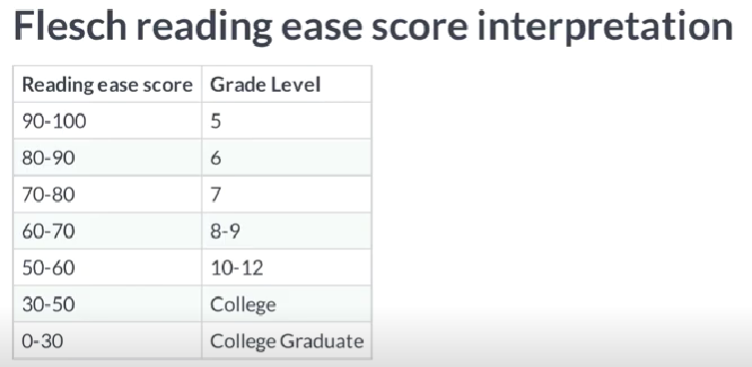

In [ ]:
pip install py-readability-metrics

In [ ]:
pip  install readability-lxml

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def get_flesch_score(essay_text):
  from readability import Readability
  r = Readability(essay_text)
  fk = r.flesch_kincaid()
  readability_score = fk.score
  return round(readability_score,2)

df_essays['FleschScore'] = df_essays.apply(lambda x: get_flesch_score(x['Essay Text']),axis=1) 

In [ ]:
df_essays.head(30)

,Essay Text,Essay Grading,SentenceCount,WordCount,VerbCount,NounCount,AdjCount,AdverbCount,PronounCount,PunctCount,NumberofActiveVoice,NumComplex,NumCompund,NumSimple,FleschScore
0,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C),35,816,0.12,0.17,0.09,0.06,0.06,0.12,0.82,0.514286,0.314286,0.171429,10.19
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C),28,587,0.13,0.19,0.08,0.05,0.08,0.09,0.85,0.357143,0.250000,0.392857,9.15
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+),40,1005,0.11,0.15,0.08,0.05,0.08,0.11,0.78,0.700000,0.125000,0.175000,11.02
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C),20,571,0.12,0.16,0.07,0.06,0.08,0.11,0.75,0.600000,0.200000,0.200000,12.07
4,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C),23,549,0.10,0.19,0.06,0.05,0.05,0.11,0.82,0.304348,0.434783,0.260870,11.67
5,"My eyes widen. “It’s all Greek to me,” I whisp...",Excellent (A+),46,736,0.14,0.21,0.06,0.03,0.07,0.12,0.93,0.260870,0.260870,0.478261,7.82
6,"I could still hear her words, the words my tea...",Average (B-C),31,712,0.14,0.18,0.05,0.03,0.08,0.11,0.87,0.387097,0.290323,0.322581,10.36
7,It was a wet and dreary October evening. I sho...,Average (B-C),30,736,0.14,0.21,0.06,0.07,0.07,0.11,1.00,0.400000,0.233333,0.366667,10.13
8,"Oreos. On the exterior, a firm chocolate crust...",Average (B-C),43,756,0.13,0.17,0.09,0.04,0.06,0.12,0.43,0.511628,0.209302,0.279070,9.18
9,"Whether I was blowing out candles, writing a l...",Average (B-C),21,698,0.13,0.17,0.06,0.05,0.09,0.10,0.92,0.809524,0.095238,0.095238,13.88


## **Number of 'Unique Words' Feature**

In [ ]:
#stop_words = set(stopwords.words('english'))

nlp = spacy.load("en_core_web_sm")


def non_stop_words(essay):
  word_tokens = word_tokenize(essay)
  #filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  filtered_sentence = [w for w in word_tokens]
  str1 = ' '.join(filtered_sentence)
  mylist = re.findall(r'[^!?.,-;]+',str1) # To remove punctuations
  str1 = ''.join(mylist)
  return str1,len(filtered_sentence)

def word_count(essay):
  out = []
  seen = set()
  string,length = non_stop_words(essay)
  doc = nlp(string)
  for word in doc:
    if word.text not in seen:
      if word.text != ' ':
        out.append(word)
        seen.add(word.text)
  #print(len(seen))
  return (len(seen)/length)   # Unique words density
  #return (len(seen))   # Unique words set


df_essays['UniqWordDensity']  = df_essays.apply(lambda x: word_count(x['Essay Text']), axis=1)

In [ ]:
df_essays.head()
#print(df_test['Essay Text'].values)

,Essay Text,Essay Grading,SentenceCount,WordCount,VerbCount,NounCount,AdjCount,AdverbCount,PronounCount,PunctCount,NumberofActiveVoice,NumComplex,NumCompund,NumSimple,FleschScore,UniqWordDensity
0,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C),35,816,0.12,0.17,0.09,0.06,0.06,0.12,0.82,0.514286,0.314286,0.171429,10.19,0.488722
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C),28,587,0.13,0.19,0.08,0.05,0.08,0.09,0.85,0.357143,0.250000,0.392857,9.15,0.500000
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+),40,1005,0.11,0.15,0.08,0.05,0.08,0.11,0.78,0.700000,0.125000,0.175000,11.02,0.394366
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C),20,571,0.12,0.16,0.07,0.06,0.08,0.11,0.75,0.600000,0.200000,0.200000,12.07,0.514286
4,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C),23,549,0.10,0.19,0.06,0.05,0.05,0.11,0.82,0.304348,0.434783,0.260870,11.67,0.503676


In [ ]:
df_essays.head()

In [ ]:
nlp = spacy.load('en_core_web_sm')

def showntell_essay(InputEssay):
  doc  = nlp(InputEssay)
  mental_tells = ['loved','realized','thought','hoped','considered','wondered','prayed','knew','saw','watched','heard','felt','could','see','seemed','appeared',
  'looked','believed','reflected','disgusted','feared','show','noticed','smelled','wonder','walked','come','hate','decided','wished','feel','see','smell',
  'fell']

  emotional_tells = ['adoration','agitation','amazement','amusement','anger','anguish','annoyance','anticipation','anxiety','confidence','conflicted','confusion',
  'contempt','curiosity','defeat','defensiveness','denial','depression','desire','desperation','determination','disappointment','disbelief','disgust','doubt','dread',
  'eagerness','elation','embarrassment','envy','excitement','fear','frustration','gratitude','guilt','happiness','hatred','hopefulness','humiliation','hurt','impatience',
  'indifference','insecurity','irritation','jealousy','loneliness','love','nervousness','nostalgia','overwhelmed','paranoia','peacefulness','pride','rage','regret','relief',
  'reluctance','remorse','resentment','resignation','sadness','satisfaction','scorn','shame','skepticism','smugness','somberness','surprise','shock','suspicion','sympathy',
  'terror','uncertainty','unease','wariness','worry']

  motivational_tells = ['decided','because','tried','when']

  emotional_adjectives = ['frustated', 'happy', 'tall', 'angry', 'sad', 'hungry', 'excited', 'embarrased', 'bright', 'shocked', 'hot', 'beautiful', 
                          'afraid', 'cold', 'interesting', 'confused', 'sweet', 'different', 'scared', 'mournful', 'furious', 'overwhelmed', 'stressed', 
                          'unique', 'overjoyed', 'scarier', 'tired', 'shy', 'giddy', 'anxious','chilly','friendly','ghastly','ghostly','holy','kingly',
                          'knightly','lonely','lovely','orderly','prickly','queenly','surly','ugly','worldly','wrinkly']

  adverbs_avoid = ['very', 'really', 'spectacularly','already' 'abruptly', 'absently', 'absentmindedly', 'accusingly', 'actually', 'adversely', 'affectionately', 
                  'amazingly', 'angrily', 'anxiously', 'arrogantly', 'bashfully', 'beautifully', 'boldly', 'bravely', 'breathlessly', 'brightly', 'briskly', 'broadly', 
                  'calmly', 'carefully', 'carelessly', 'certainly', 'cheaply', 'cheerfully', 'cleanly', 'clearly', 'cleverly', 'closely', 'clumsily', 'coaxingly', 'commonly', 
                  'compassionately', 'conspicuously', 'continually', 'coolly', 'correctly', 'crisply', 'crossly', 'curiously', 'daintily', 'dangerously', 'darkly', 'dearly', 
                  'deceivingly', 'delicately', 'delightfully', 'desperately', 'determinedly', 'diligently', 'disgustingly', 'distinctly', 'doggedly', 'dreamily', 'emptily', 
                  'energetically', 'enormously', 'enticingly', 'entirely', 'enviously', 'especially', 'evenly', 'exactly', 'excitedly', 'exclusively', 'expertly', 'extremely', 
                  'fairly', 'faithfully', 'famously', 'fearlessly', 'ferociously', 'fervently', 'finally', 'foolishly', 'fortunately', 'frankly', 'frantically', 'freely', 
                  'frenetically', 'frightfully', 'fully', 'furiously', 'generally', 'generously', 'gently', 'gleefully', 'gratefully', 'greatly', 'greedily', 'grumpily', 
                  'guiltily', 'happily', 'harshly', 'hatefully', 'heartily', 'heavily', 'helpfully', 'helplessly', 'highly', 'hopelessly', 'hungrily', 'immediately', 'importantly', 
                  'impulsively', 'inadvertently', 'increasingly', 'incredibly', 'innocently', 'instantly', 'intensely', 'intently', 'inwardly', 'jokingly', 'kindly', 'knowingly', 
                  'lawfully', 'lightly', 'likely', 'longingly', 'loudly', 'madly', 'marvelously', 'meaningfully', 'mechanically', 'meekly', 'mentally', 'messily', 'mindfully', 'miserably', 
                  'mockingly', 'mostly', 'mysteriously', 'naturally', 'nearly', 'neatly', 'negatively', 'nervously', 'nicely', 'obviously', 'occasionally', 'oddly', 'openly', 'outwardly', 
                  'partially', 'passionately', 'patiently', 'perfectly', 'perpetually', 'playfully', 'pleasantly', 'pleasingly', 'politely', 'poorly', 'positively', 'potentially', 'powerfully', 
                  'professionally', 'properly', 'proudly', 'quaveringly', 'queerly', 'quickly', 'quietly', 'quintessentially', 'rapidly', 'rapturously', 'ravenously', 'readily', 'reassuringly', 
                  'regretfully', 'reluctantly', 'reproachfully', 'restfully', 'righteously', 'rightfully', 'rigidly', 'rudely', 'sadly', 'safely', 'scarcely', 'searchingly', 'sedately', 
                  'seemingly', 'selfishly', 'separately', 'seriously', 'sharply', 'sheepishly', 'sleepily', 'slowly', 'slyly', 'softly', 'solidly', 'speedily', 'sternly', 'stingily', 'strictly', 
                  'stubbornly', 'successfully', 'superstitiously', 'surprisingly', 'suspiciously', 'sympathetically', 'tenderly', 'terribly', 'thankfully', 'thoroughly', 'thoughtfully', 'tightly', 
                  'totally', 'tremendously', 'triumphantly', 'truly', 'truthfully', 'understandably', 'unfairly', 'unfortunately', 'unhappily', 'unwillingly', 'urgently', 'usually', 'utterly', 'vastly', 
                  'venomously', 'viciously', 'violently', 'warmly', 'wearily wholly', 'wildly', 'wilfully', 'wisely', 'wonderfully', 'wonderingly', 'worriedly']

  aux_tell_list = []
  ment_tell_list = []
  det_tell_list = []
  motiv_tell_list = []
  emot_adj_tell_list  = []
  adv_tell_list  = []
  adj_tell_list = []
  sent_level_dict = {}
  count = 0

  output_dict = {}

  adj_dict_inner = {}
  adv_dict_inner = {}
  aux_dict_inner = {}
  emot_dict_inner = {}
  det_dict_inner = {}
  ment_dict_inner = {}
  motiv_dict_inner = {}

  doc_sents = [sent for sent in doc.sents]
  len_tot_sents = len(doc_sents)
  for sents in doc.sents:
    count = 0
    for ix,token in enumerate(sents):
      tok_pos=token.idx
      try:
        if token.is_sent_start:    # checking for first token
          if sents[ix].tag_ == 'PRP' or sents[ix].tag_ == 'PRP$' or sents[ix].tag_ == 'NN' :        # check for 'PRP' (Pronoun Personal) specifically with  'I','We','They','He','She'. 'You'.,check for 'PRP$' (Pronoun Possessive) my, our, your, his, her, its, and their,check for 'NN' (noun, singular or mass) i.e. 'Non-specific Nouns'
            if sents[ix + 1].pos_ == 'AUX' or sents[ix + 1].pos_ == 'MD':                           # check for the token to the right for 'AUX' and 'MD'.
              tok = (sents[ix:ix+2])     # getting the right token as well
              right_pos = sents[ix+2].idx-1 # getting the right 2 token's starting character offset.                                                    
              aux_dict_inner["startIndex"] = tok_pos
              aux_dict_inner["endIndex"]   = right_pos
              aux_dict_inner["text"]       = tok
              aux_tell_list.append(aux_dict_inner.copy())          
              count +=1
              sent_level_dict[sents] = count
            elif sents[ix + 1].pos_ == 'VERB':
              if sents[ix+1].text.lower() in mental_tells or sents[ix+1].lemma_.lower() in mental_tells: # check if the token next to the first token is a 'VERB' out of 'mental tell' verbs.
                tok = (sents[ix:ix+2])                                                                  # check for 'NN' (noun, singular or mass) i.e. 'Non-specific Nouns'
                right_pos = sents[ix+2].idx-1 # getting the right 2 token's starting character offset.                                                    
                ment_dict_inner["startIndex"] = tok_pos
                ment_dict_inner["endIndex"]   = right_pos
                ment_dict_inner["text"]       = tok
                ment_tell_list.append(ment_dict_inner.copy())                
                count +=1
                sent_level_dict[sents] = count            
          elif sents[ix].pos_ == 'DET':                                                             # check if the first token is a 'determiner' 
            if sents[ix + 1].pos_ == 'ADJ' or sents[ix + 1].tag_ == 'RBS':                          # and next one is 'adverb superlative' or an 'adjective'.
                tok = (sents[ix:ix+2])
                right_pos = sents[ix+2].idx-1 # getting the right 2 token's starting character offset.                                                    
                det_dict_inner["startIndex"] = tok_pos
                det_dict_inner["endIndex"]   = right_pos
                det_dict_inner["text"]       = tok              
                det_tell_list.append(det_dict_inner.copy())
                count +=1
                sent_level_dict[sents] = count          
      except:
        continue        
      if token.text.lower() in motivational_tells or token.lemma_.lower() in motivational_tells:   # check if the token is out of the 'motivational tell' list
          tok = token.text.lower()
          right_pos = sents[ix+1].idx-1 # getting the right 2 token's starting character offset.                                                    
          motiv_dict_inner["startIndex"] = tok_pos
          motiv_dict_inner["endIndex"]   = right_pos
          motiv_dict_inner["text"]       = tok       
          motiv_tell_list.append(motiv_dict_inner.copy())
          count +=1
          sent_level_dict[sents] = count        
      elif sents[ix].text.lower() == 'to' and sents[ix + 1].pos_ == 'VERB':                        # check if the word is of the form 'to [Verb]'
          tok = (sents[ix:ix+2])
          right_pos = sents[ix+2].idx-1 # getting the right 2 token's starting character offset.                                                    
          motiv_dict_inner["startIndex"] = tok_pos
          motiv_dict_inner["endIndex"]   = right_pos
          motiv_dict_inner["text"]       = tok       
          motiv_tell_list.append(motiv_dict_inner.copy())
          count +=1
          sent_level_dict[sents] = count        
      elif any(x in sents[ix].text.lower() for x in ['with','in']) and (sents[ix + 1].pos_ == 'NOUN' or sents[ix + 1].pos_ == 'PROPN') and sents[ix + 1].text.lower() in emotional_tells: # check if the word is of the form 'with [noun] or in [noun]'
          tok = (sents[ix:ix+2])
          right_pos = sents[ix+2].idx-1 # getting the right 2 token's starting character offset.  
          emot_dict_inner["startIndex"] = tok_pos
          emot_dict_inner["endIndex"]   = right_pos
          emot_dict_inner["text"]       = tok                                                         
          emot_adj_tell_list.append(emot_dict_inner.copy())
          count +=1
          sent_level_dict[sents] = count        
      elif token.pos_ == 'ADJ' and (token.text.lower() in emotional_adjectives or token.lemma_.lower() in emotional_adjectives):  # check if the word is out of the list of 'emotional' adjective word list
        tok = token.text.lower()
        right_pos = sents[ix+1].idx-1 # getting the right 2 token's starting character offset.                                                    
        adj_dict_inner["startIndex"] = tok_pos
        adj_dict_inner["endIndex"]   = right_pos
        adj_dict_inner["text"]       = tok     
        adj_tell_list.append(adj_dict_inner.copy())
        count +=1
        sent_level_dict[sents] = count      
      elif token.pos_ == 'ADV' and (token.text.lower() in adverbs_avoid or token.lemma_.lower() in adverbs_avoid):             # check if the word is out of the list of 'adverb to avoid' word list
        tok_pos=token.idx
        right_pos = sents[ix+1].idx-1 # getting the right token's starting character offset.
        tok = token.text.lower()
        adv_dict_inner["startIndex"] = tok_pos
        adv_dict_inner["endIndex"]   = right_pos
        adv_dict_inner["text"]       = tok  
        adv_tell_list.append(adv_dict_inner.copy())
        count +=1
        sent_level_dict[sents] = count   
  
  return (len(sent_level_dict))
df_essays['TellDensity']  = df_essays.apply(lambda x: showntell_essay(x['Essay Text']), axis=1)


In [ ]:
df_essays.head()

,Essay Text,Essay Grading,SentenceCount,WordCount,VerbCount,NounCount,AdjCount,AdverbCount,PronounCount,PunctCount,NumberofActiveVoice,NumComplex,NumCompund,NumSimple,FleschScore,UniqWordDensity,TellDensity
0,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C),35,816,0.12,0.17,0.09,0.06,0.06,0.12,0.82,0.514286,0.314286,0.171429,10.19,0.488722,22
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C),28,587,0.13,0.19,0.08,0.05,0.08,0.09,0.85,0.357143,0.250000,0.392857,9.15,0.500000,16
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+),40,1005,0.11,0.15,0.08,0.05,0.08,0.11,0.78,0.700000,0.125000,0.175000,11.02,0.394366,24
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C),20,571,0.12,0.16,0.07,0.06,0.08,0.11,0.75,0.600000,0.200000,0.200000,12.07,0.514286,10
4,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C),23,549,0.10,0.19,0.06,0.05,0.05,0.11,0.82,0.304348,0.434783,0.260870,11.67,0.503676,13


## **Using TfIdf Vectorizer**

###Spacy use is limited to 'Text Preprocessing' but not into 'Vectorization' or training.

### Next level of sophistication can be built by converting each word in the mail into its numerical value. We call this a 'word vectors'.

## **Technique**:
### An "*inverse document frequency factor*" is incorporated, which diminishes the weight of terms that occur very frequently in the document set and 	       increases the weight of the terms that occur rarely.

### This technique is implemented using **TfIdf Vectorizer** which also creates a 'DTM' matrix . However, instead of filling up the DTM with the 'token counts' , it calculates 'term frequency inverse document 	frequency' value for each word (TF-IDF).

In [ ]:
# # Split the data into features and target label
# y = df_essays['Essay Grading']
# X = df_essays['Essay Text']

# y = y.apply(lambda x:2 if x=="Excellent (A+)" else 1 if x=='Average (B-C)' else 0)


# # Import train_test_split

# # Split the 'features' and 'income' data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                     y, 
#                                                     test_size = 0.2, 
#                                                     random_state = 0)

# # Show the results of the split
# print("Training set has {} samples.".format(X_train.shape[0]))
# print("Testing set has {} samples.".format(X_test.shape[0]))

# # Naïve Bayes:
# text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
#                      ('clf', MultinomialNB()),
# ])
# text_clf_nb.fit(X_train, y_train)

# y_train_pred = text_clf_nb.predict(X_train)
# y_test_pred = text_clf_nb.predict(X_test)

# # # Calculate the accuracy
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print('The training accuracy is', train_accuracy)
# print('The test accuracy is', test_accuracy)
# print('F1 score: ', format(f1_score(y_test,y_test_pred,average='micro')))
# confusion_matrix(y_test, y_test_pred)

# Average number of characters per word.


In [ ]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import re
def count_words(essay):
  mylist = re.findall(r'[^!?.,-;]+',essay) # To remove punctuations  
  str1 = ' '.join(mylist)
  str2 = word_tokenize(str1)
  return len(str2)

def char_count(essay):
  mylist = re.findall(r'[^!?.,-;]+',essay) # To remove punctuations  
  str1 = ''.join(mylist)    
  docu = nlp(str1)
  len_char = []
  for token in docu:
    #print(f'{token.idx} {token.lower_} {token.pos_} {spacy.explain(token.pos_)}  {token.tag_} {spacy.explain(token.tag_)} {token.dep_} {spacy.explain(token.dep_)}')
    len_char.append(len(token))
  return sum(len_char)

def avg_char_count(essay):
  return round(char_count(essay)/count_words(essay),2)

df_essays['AvgChar']  = df_essays.apply(lambda x: avg_char_count(x['Essay Text']), axis=1)

# Average number of syllables per word

In [ ]:
pip install syllables

In [ ]:
def count_syllables_per_word(essay):
  import syllables
  mylist = re.findall(r'[^!?.,-;]+',essay) # To remove punctuations  
  str1 = ''.join(mylist)  
  count_s = syllables.estimate(str1)
  return round(count_s/count_words(essay),2)
df_essays['Syllablesperword']  = df_essays.apply(lambda x: count_syllables_per_word(x['Essay Text']), axis=1)  

In [ ]:
pip install lexical-diversity

     |████████████████████████████████| 117 kB 3.3 MB/s 


# Lexical diversity MTLD

In [ ]:
from lexical_diversity import lex_div as ld
def calc_mtld(essay):
  mylist = re.findall(r'[^!?.,-;]+',essay) # To remove punctuations  
  str1 = ''.join(mylist) 
  return round(ld.mtld(str1),2)
df_essays['mtld']  = df_essays.apply(lambda x: calc_mtld(x['Essay Text']), axis=1)  

# NER List

In [ ]:
# Percentage of named entities in all entities.
def count_ner_per_ent(essay):
  ner_list = []
  doc=nlp(essay)
  for entity in doc.ents:
    ner_list.append(entity.text)
  return round(len(ner_list)/count_words(essay),2)
df_essays['namedEntities']  = df_essays.apply(lambda x: count_ner_per_ent(x['Essay Text']), axis=1)    

# Named Entities per sentence

In [ ]:
# Percentage of named entities per sentence.
def count_ner_per_sent(essay):
  ner_list = []
  doc=nlp(essay)
  for entity in doc.ents:
    ner_list.append(entity.text)
  return round(len(ner_list)/count_sentences(essay),2)
df_essays['nerPerSent']  = df_essays.apply(lambda x: count_ner_per_sent(x['Essay Text']), axis=1)      

In [ ]:
df_essays.head()

,Essay Text,Essay Grading,SentenceCount,WordCount,VerbCount,NounCount,AdjCount,AdverbCount,PronounCount,PunctCount,...,NumCompund,NumSimple,FleschScore,UniqWordDensity,TellDensity,AvgChar,Syllablesperword,mtld,namedEntities,nerPerSent
0,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C),35,816,0.12,0.17,0.09,0.06,0.06,0.12,...,0.314286,0.171429,10.19,0.488722,22,4.46,1.49,14.18,0.05,0.94
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C),28,587,0.13,0.19,0.08,0.05,0.08,0.09,...,0.250000,0.392857,9.15,0.500000,16,4.01,1.35,13.68,0.04,0.75
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+),40,1005,0.11,0.15,0.08,0.05,0.08,0.11,...,0.125000,0.175000,11.02,0.394366,24,4.34,1.51,13.34,0.07,1.65
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C),20,571,0.12,0.16,0.07,0.06,0.08,0.11,...,0.200000,0.200000,12.07,0.514286,10,4.48,1.51,13.29,0.03,0.75
4,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C),23,549,0.10,0.19,0.06,0.05,0.05,0.11,...,0.434783,0.260870,11.67,0.503676,13,4.72,1.58,13.60,0.07,1.52


# CEFR Level

In [ ]:
import pandas as pd
import numpy as np
import json
import re
import os
from textblob import TextBlob
from nltk.tokenize import word_tokenize

#from textacy.preprocess import normalize_whitespace, preprocess_text


def categorizeText(input_text):
    """
    :Returns: List = [MainLevel, Difficulty] (some sort of language level)
    """
    if (not(isinstance(input_text, str)) or (len(input_text) <= 0)):
        dicti = {"unknown": "NOT OKAY!", "A1": "THIS!", "A2" : "IS!", "B1": "NOT!", "B2": "A!", "C1": "TEXT!", "C2": "NO!"}
        return ["NO!", "NO!", dicti]

    # normalize text with NLP
    processed_text = processText(input_text)
    
    # store words of text lowercase in list
    words: list = [item.lower() for item in processed_text.split()]

    # count frequency of word in text
    word_frequency: dict = getWordFrequency(words)

    # Dataframe, set der Worte mit Sprachniveau
    # word, level
    set_word_table = getWordLevelDataFrameForText(set(words))

    # Viewing the distribution
    verteilung = {}
    tmp_count = 0
    
    #for each word from the text, ordered by level,
    
    for lvl in ["unknown", "A1", "A2", "B1", "B2", "C1", "C2"]:
        for word in set_word_table.loc[set_word_table['level']== lvl, "word"]:
            tmp_count += word_frequency[word]
        tmp_result = tmp_count/ len(words) * 100
        verteilung[lvl] = round(tmp_result)
        tmp_count = 0
    
    #Rank based on the highest level that contains more than n different words
    n = 4
    levels, counts = np.unique(set_word_table['level'], return_counts=True)
    
    if (len(levels) > 0):
        tmp_index, = np.where(levels == "unknown") # löschen der Stellen, an denen die Werte für UNKNOWN Worte stehen, da diese kein Sprachniveau sind
        levels = np.delete(levels, tmp_index)
        counts = np.delete(counts, tmp_index)
    max_level = np.max(levels[counts > n])
    
    #Difficulty rating of unknown words, limit: m
    count_easy = 0
    count_hard = 0
    m = 6 # siehe Wolfram alpha 5.1
    
    for word in set_word_table.loc[set_word_table['level']== "unknown", "word"]:
        if len(word) > m:
            count_hard += 1
        elif len(word) <= m:
            count_easy += 1   
    
    if count_easy <= count_hard:
        difficulty = "hard"
    else:
        difficulty = "easy"

    # return list [mainLevel, level of difficulty, language level_distribution]
    ret_list_str = ["unknown", "A1", "A2", "B1", "B2", "C1", "C2"]
    return [ret_list_str.index(m) for m in ret_list_str if m == max_level][0]
    


def getWordFrequency(words: list) -> dict:
    """
    :Return: dictionary with word and count
    """
    dici = {}

    for word in words:
        if word in dici:     
            dici[word] += 1
        else:
            dici[word] = 1
            
    return dici


def getWordLevelDataFrameForText(text):
    """
    Eingabe: set(text)
    Ausgabe: DataFrame mit word und level (A1 - C2, unknown) für das gegebene Set des Textes
    """

    # create DataFrame
    word_level_table = pd.DataFrame(columns=['word', 'level'])

    # open CEFR vocabulary file for english
    scriptDir = '/content/gdrive/MyDrive/EssayScoringDataSet/cefr/'
    relPath = "cefr_vocab_en.json"
    cefr_file = open(os.path.join(scriptDir, relPath))
    cefr_data = json.load(cefr_file)

    for w in set(text):

        level: str = ""

        # find the CEFR level info for the current word
        for data in cefr_data:

            if data["word"] == w:
                if data["level"]:
                    level  = data["level"]
                else:
                    level = "unknown"

        # add row WORD LEVEL
        word_level_table = word_level_table.append(
            pd.DataFrame(
                [
                    [w, level]
                ], 
                    columns=['word', 'level']
            )
        )
        
    # close cefr json file
    cefr_file.close()

    return word_level_table


def processText(text):

    mylist = re.findall(r'[^!?.,-;]+',text) # To remove punctuations  
    str1 = ' '.join(mylist)

    # lemmatize the entire text
    # first, split the text to a list of words
    words = TextBlob(str1).words
    # then, lemmatize each word
    lemmatizedText = ""
    for w in words:
        lemmatizedText += "{} ".format(w.lemmatize())

    # normalize the whitespaces for texts which include s.l. 'Title    And I am ...'
    return lemmatizedText

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df_essays['CEFRLevel']  = df_essays.apply(lambda x: categorizeText(x['Essay Text']), axis=1)      

In [ ]:
df_essays.head()

,Essay Text,Essay Grading,SentenceCount,WordCount,VerbCount,NounCount,AdjCount,AdverbCount,PronounCount,PunctCount,...,NumSimple,FleschScore,UniqWordDensity,TellDensity,AvgChar,Syllablesperword,mtld,namedEntities,nerPerSent,CEFRLevel
0,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C),35,816,0.12,0.17,0.09,0.06,0.06,0.12,...,0.171429,10.19,0.488722,22,4.46,1.49,14.18,0.05,0.94,6
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C),28,587,0.13,0.19,0.08,0.05,0.08,0.09,...,0.392857,9.15,0.500000,16,4.01,1.35,13.68,0.04,0.75,6
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+),40,1005,0.11,0.15,0.08,0.05,0.08,0.11,...,0.175000,11.02,0.394366,24,4.34,1.51,13.34,0.07,1.65,6
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C),20,571,0.12,0.16,0.07,0.06,0.08,0.11,...,0.200000,12.07,0.514286,10,4.48,1.51,13.29,0.03,0.75,6
4,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C),23,549,0.10,0.19,0.06,0.05,0.05,0.11,...,0.260870,11.67,0.503676,13,4.72,1.58,13.60,0.07,1.52,5


# AWL feature

In [ ]:
!pip install awlify

from awlify import awlify
import json
global awl_list
awl_list = []
def iterate_nested(d):
  for k, v in d.items():
      if isinstance(v, dict):
          iterate_nested(v)
      else:
          if k == 'awl_words':
            if v:
              for val in v:
                if isinstance(val, dict):
                  iterate_nested(val)
          elif k == 'word':
            if v not in awl_list:
              awl_list.append(v)
  return len(awl_list)


def get_count_AWL(essay):
  result = awlify(essay)
  res = json.loads(result)
  awl_count  = iterate_nested(res)
  word_count = count_non_stop_words(essay)
  return round(awl_count/word_count,2)


df_essays['AWLLevel']  = df_essays.apply(lambda x: get_count_AWL(x['Essay Text']), axis=1)      

In [ ]:
df_essays.head()

,Essay Text,Essay Grading,SentenceCount,WordCount,VerbCount,NounCount,AdjCount,AdverbCount,PronounCount,PunctCount,...,FleschScore,UniqWordDensity,TellDensity,AvgChar,Syllablesperword,mtld,namedEntities,nerPerSent,CEFRLevel,AWLLevel
0,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C),35,816,0.12,0.17,0.09,0.06,0.06,0.12,...,10.19,0.488722,22,4.46,1.49,14.18,0.05,0.94,6,0.03
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C),28,587,0.13,0.19,0.08,0.05,0.08,0.09,...,9.15,0.500000,16,4.01,1.35,13.68,0.04,0.75,6,0.12
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+),40,1005,0.11,0.15,0.08,0.05,0.08,0.11,...,11.02,0.394366,24,4.34,1.51,13.34,0.07,1.65,6,0.11
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C),20,571,0.12,0.16,0.07,0.06,0.08,0.11,...,12.07,0.514286,10,4.48,1.51,13.29,0.03,0.75,6,0.25
4,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C),23,549,0.10,0.19,0.06,0.05,0.05,0.11,...,11.67,0.503676,13,4.72,1.58,13.60,0.07,1.52,5,0.29


# TTR

In [ ]:
def get_ttr_stats(str1):
  tok = ld.tokenize(str1)
  flt = ld.flemmatize(str1)
  return(ld.ttr(flt),ld.root_ttr(flt),ld.log_ttr(flt))

df_essays[['ttr','root_ttr','log_ttr']] = df_essays.apply(lambda row: pd.Series(get_ttr_stats(row['Essay Text'])),axis=1) 


In [ ]:
df_essays.head()

,Essay Text,Essay Grading,SentenceCount,WordCount,VerbCount,NounCount,AdjCount,AdverbCount,PronounCount,PunctCount,...,AvgChar,Syllablesperword,mtld,namedEntities,nerPerSent,CEFRLevel,AWLLevel,ttr,root_ttr,log_ttr
0,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C),35,816,0.12,0.17,0.09,0.06,0.06,0.12,...,4.46,1.49,14.18,0.05,0.94,6,0.03,0.505780,13.305004,0.895765
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C),28,587,0.13,0.19,0.08,0.05,0.08,0.09,...,4.01,1.35,13.68,0.04,0.75,6,0.12,0.492395,11.292937,0.886921
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+),40,1005,0.11,0.15,0.08,0.05,0.08,0.11,...,4.34,1.51,13.34,0.07,1.65,6,0.11,0.387244,11.474444,0.860025
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C),20,571,0.12,0.16,0.07,0.06,0.08,0.11,...,4.48,1.51,13.29,0.03,0.75,6,0.25,0.506000,11.314504,0.890384
4,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C),23,549,0.10,0.19,0.06,0.05,0.05,0.11,...,4.72,1.58,13.60,0.07,1.52,5,0.29,0.504167,11.045738,0.889072


## Below, We will not use **'TfIdfVectorizer'** but will use the features engineered above to do training and predictions.

In [ ]:
# Split the data into features and target label
y = df_essays['Essay Grading']
X = df_essays['Essay Text']

y = y.apply(lambda x:2 if x=="Excellent (A+)" else 1 if x=='Average (B-C)' else 0)


# Import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])
text_clf_nb.fit(X_train, y_train)

y_train_pred = text_clf_nb.predict(X_train)
y_test_pred = text_clf_nb.predict(X_test)

# # Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)
print('F1 score: ', format(f1_score(y_test,y_test_pred,average='micro')))
confusion_matrix(y_test, y_test_pred)

In [ ]:
import dill as pickle

# Split the data into features and target label
y = df_essays['Essay Grading']
X = df_essays.drop(['Essay Grading','Essay Text'], axis = 1)

y = y.apply(lambda x:2 if x=="Excellent (A+)" else 1 if x=='Average (B-C)' else 0)

# Import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

model = SVC(kernel='rbf', gamma=1,random_state = 39,probability=True,C=1000)
model.fit(X_train, y_train)
# # # Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(model.predict_proba(X_test))

# # #results = model.predict_proba(X_test)[0]


# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)
print('F1 score: ', format(f1_score(y_test,y_test_pred,average='micro')))
confusion_matrix(y_test, y_test_pred)

filename = os.path.join("/content/gdrive/MyDrive/Textify.ai/","ModelNewFeatures.pkl")
pickle.dump(model, open(filename, 'wb'))


Training set has 587 samples.
Testing set has 147 samples.
[[0.06159826 0.53611117 0.40229058]
 [0.06159826 0.53611117 0.40229058]
 [0.06159826 0.53611117 0.40229058]
 [0.06159826 0.53611117 0.40229058]
 [0.06159826 0.53611114 0.4022906 ]
 [0.06159826 0.53611117 0.40229058]
 [0.06159826 0.5361122  0.40228954]
 [0.06159826 0.53611117 0.40229058]
 [0.0615984  0.53611498 0.40228663]
 [0.06159826 0.53611117 0.40229058]
 [0.06159826 0.53611117 0.40229057]
 [0.06510057 0.52160121 0.41329822]
 [0.06159826 0.53611117 0.40229058]
 [0.06159826 0.53611127 0.40229047]
 [0.06159826 0.53611117 0.40229058]
 [0.06159826 0.53611117 0.40229058]
 [0.06160905 0.53607199 0.40231896]
 [0.06159826 0.53611117 0.40229058]
 [0.06159826 0.53611117 0.40229058]
 [0.06159826 0.53611117 0.40229058]
 [0.06159826 0.53611116 0.40229058]
 [0.06159826 0.53611117 0.40229058]
 [0.06159826 0.53611117 0.40229058]
 [0.06159854 0.53610993 0.40229153]
 [0.06159826 0.53611117 0.40229058]
 [0.06159826 0.53611117 0.40229058]
 [0.0

In [ ]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(solver='lbfgs', random_state=0,max_iter =10000)
lr.fit(X_train, y_train)
print(lr.predict_proba(X_test))

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)
print('F1 score: ', format(f1_score(y_test,y_test_pred,average='micro')))
confusion_matrix(y_test, y_test_pred)


filename = os.path.join("/content/gdrive/MyDrive/Textify.ai/","LogRegEssayGrader.sav")
pickle.dump(model, open(filename, 'wb'))


[[0.05964791 0.45074232 0.48960977]
 [0.05274692 0.5551043  0.39214878]
 [0.0452368  0.48115391 0.47360929]
 [0.06358353 0.43112011 0.50529636]
 [0.06506717 0.58349105 0.35144178]
 [0.07999556 0.51697433 0.40303011]
 [0.09322853 0.52615274 0.38061873]
 [0.0569626  0.47721097 0.46582643]
 [0.05825424 0.49806721 0.44367855]
 [0.05478746 0.53056968 0.41464285]
 [0.04290894 0.49689084 0.46020022]
 [0.0264493  0.40978816 0.56376254]
 [0.05512549 0.4773674  0.46750711]
 [0.05691351 0.57101006 0.37207643]
 [0.10466586 0.46314488 0.43218926]
 [0.04070966 0.55913844 0.4001519 ]
 [0.05120049 0.49518147 0.45361804]
 [0.04460006 0.47765829 0.47774165]
 [0.09501053 0.58082151 0.32416796]
 [0.043364   0.59819852 0.35843748]
 [0.0724021  0.49410761 0.43349029]
 [0.09387508 0.62694389 0.27918103]
 [0.03670768 0.44015577 0.52313655]
 [0.05228771 0.50270403 0.44500825]
 [0.07947787 0.60246255 0.31805958]
 [0.04334199 0.56987659 0.38678142]
 [0.05805367 0.52686674 0.41507959]
 [0.04246836 0.52903429 0.42

In [ ]:
global str

import dill as pickle
import spacy
import nltk
import textwrap
from nltk.tokenize import word_tokenize
import pandas as pd
import re
from textatistic import Textatistic

nlp = spacy.load('en_core_web_sm')

def showntell_essay(InputEssay):
  nlp = spacy.load('en_core_web_sm')
  doc  = nlp(InputEssay)
  mental_tells = ['loved','realized','thought','hoped','considered','wondered','prayed','knew','saw','watched','heard','felt','could','see','seemed','appeared',
  'looked','believed','reflected','disgusted','feared','show','noticed','smelled','wonder','walked','come','hate','decided','wished','feel','see','smell',
  'fell']

  emotional_tells = ['adoration','agitation','amazement','amusement','anger','anguish','annoyance','anticipation','anxiety','confidence','conflicted','confusion',
  'contempt','curiosity','defeat','defensiveness','denial','depression','desire','desperation','determination','disappointment','disbelief','disgust','doubt','dread',
  'eagerness','elation','embarrassment','envy','excitement','fear','frustration','gratitude','guilt','happiness','hatred','hopefulness','humiliation','hurt','impatience',
  'indifference','insecurity','irritation','jealousy','loneliness','love','nervousness','nostalgia','overwhelmed','paranoia','peacefulness','pride','rage','regret','relief',
  'reluctance','remorse','resentment','resignation','sadness','satisfaction','scorn','shame','skepticism','smugness','somberness','surprise','shock','suspicion','sympathy',
  'terror','uncertainty','unease','wariness','worry']

  motivational_tells = ['decided','because','tried','when']

  emotional_adjectives = ['frustated', 'happy', 'tall', 'angry', 'sad', 'hungry', 'excited', 'embarrased', 'bright', 'shocked', 'hot', 'beautiful', 
                          'afraid', 'cold', 'interesting', 'confused', 'sweet', 'different', 'scared', 'mournful', 'furious', 'overwhelmed', 'stressed', 
                          'unique', 'overjoyed', 'scarier', 'tired', 'shy', 'giddy', 'anxious','chilly','friendly','ghastly','ghostly','holy','kingly',
                          'knightly','lonely','lovely','orderly','prickly','queenly','surly','ugly','worldly','wrinkly']

  adverbs_avoid = ['very', 'really', 'spectacularly','already' 'abruptly', 'absently', 'absentmindedly', 'accusingly', 'actually', 'adversely', 'affectionately', 
                  'amazingly', 'angrily', 'anxiously', 'arrogantly', 'bashfully', 'beautifully', 'boldly', 'bravely', 'breathlessly', 'brightly', 'briskly', 'broadly', 
                  'calmly', 'carefully', 'carelessly', 'certainly', 'cheaply', 'cheerfully', 'cleanly', 'clearly', 'cleverly', 'closely', 'clumsily', 'coaxingly', 'commonly', 
                  'compassionately', 'conspicuously', 'continually', 'coolly', 'correctly', 'crisply', 'crossly', 'curiously', 'daintily', 'dangerously', 'darkly', 'dearly', 
                  'deceivingly', 'delicately', 'delightfully', 'desperately', 'determinedly', 'diligently', 'disgustingly', 'distinctly', 'doggedly', 'dreamily', 'emptily', 
                  'energetically', 'enormously', 'enticingly', 'entirely', 'enviously', 'especially', 'evenly', 'exactly', 'excitedly', 'exclusively', 'expertly', 'extremely', 
                  'fairly', 'faithfully', 'famously', 'fearlessly', 'ferociously', 'fervently', 'finally', 'foolishly', 'fortunately', 'frankly', 'frantically', 'freely', 
                  'frenetically', 'frightfully', 'fully', 'furiously', 'generally', 'generously', 'gently', 'gleefully', 'gratefully', 'greatly', 'greedily', 'grumpily', 
                  'guiltily', 'happily', 'harshly', 'hatefully', 'heartily', 'heavily', 'helpfully', 'helplessly', 'highly', 'hopelessly', 'hungrily', 'immediately', 'importantly', 
                  'impulsively', 'inadvertently', 'increasingly', 'incredibly', 'innocently', 'instantly', 'intensely', 'intently', 'inwardly', 'jokingly', 'kindly', 'knowingly', 
                  'lawfully', 'lightly', 'likely', 'longingly', 'loudly', 'madly', 'marvelously', 'meaningfully', 'mechanically', 'meekly', 'mentally', 'messily', 'mindfully', 'miserably', 
                  'mockingly', 'mostly', 'mysteriously', 'naturally', 'nearly', 'neatly', 'negatively', 'nervously', 'nicely', 'obviously', 'occasionally', 'oddly', 'openly', 'outwardly', 
                  'partially', 'passionately', 'patiently', 'perfectly', 'perpetually', 'playfully', 'pleasantly', 'pleasingly', 'politely', 'poorly', 'positively', 'potentially', 'powerfully', 
                  'professionally', 'properly', 'proudly', 'quaveringly', 'queerly', 'quickly', 'quietly', 'quintessentially', 'rapidly', 'rapturously', 'ravenously', 'readily', 'reassuringly', 
                  'regretfully', 'reluctantly', 'reproachfully', 'restfully', 'righteously', 'rightfully', 'rigidly', 'rudely', 'sadly', 'safely', 'scarcely', 'searchingly', 'sedately', 
                  'seemingly', 'selfishly', 'separately', 'seriously', 'sharply', 'sheepishly', 'sleepily', 'slowly', 'slyly', 'softly', 'solidly', 'speedily', 'sternly', 'stingily', 'strictly', 
                  'stubbornly', 'successfully', 'superstitiously', 'surprisingly', 'suspiciously', 'sympathetically', 'tenderly', 'terribly', 'thankfully', 'thoroughly', 'thoughtfully', 'tightly', 
                  'totally', 'tremendously', 'triumphantly', 'truly', 'truthfully', 'understandably', 'unfairly', 'unfortunately', 'unhappily', 'unwillingly', 'urgently', 'usually', 'utterly', 'vastly', 
                  'venomously', 'viciously', 'violently', 'warmly', 'wearily wholly', 'wildly', 'wilfully', 'wisely', 'wonderfully', 'wonderingly', 'worriedly']

  aux_tell_list = []
  ment_tell_list = []
  det_tell_list = []
  motiv_tell_list = []
  emot_adj_tell_list  = []
  adv_tell_list  = []
  adj_tell_list = []
  sent_level_dict = {}
  count = 0

  output_dict = {}

  adj_dict_inner = {}
  adv_dict_inner = {}
  aux_dict_inner = {}
  emot_dict_inner = {}
  det_dict_inner = {}
  ment_dict_inner = {}
  motiv_dict_inner = {}

  doc_sents = [sent for sent in doc.sents]
  len_tot_sents = len(doc_sents)
  for sents in doc.sents:
    count = 0
    for ix,token in enumerate(sents):
      tok_pos=token.idx
      if token.is_sent_start:    # checking for first token
        if sents[ix].tag_ == 'PRP' or sents[ix].tag_ == 'PRP$' or sents[ix].tag_ == 'NN' :        # check for 'PRP' (Pronoun Personal) specifically with  'I','We','They','He','She'. 'You'.,check for 'PRP$' (Pronoun Possessive) my, our, your, his, her, its, and their,check for 'NN' (noun, singular or mass) i.e. 'Non-specific Nouns'
          if sents[ix + 1].pos_ == 'AUX' or sents[ix + 1].pos_ == 'MD':                           # check for the token to the right for 'AUX' and 'MD'.
            tok = (sents[ix:ix+2])     # getting the right token as well
            right_pos = sents[ix+2].idx-1 # getting the right 2 token's starting character offset.                                                    
            aux_dict_inner["startIndex"] = tok_pos
            aux_dict_inner["endIndex"]   = right_pos
            aux_dict_inner["text"]       = tok
            aux_tell_list.append(aux_dict_inner.copy())          
            count +=1
            sent_level_dict[sents] = count
          elif sents[ix + 1].pos_ == 'VERB':
            if sents[ix+1].text.lower() in mental_tells or sents[ix+1].lemma_.lower() in mental_tells: # check if the token next to the first token is a 'VERB' out of 'mental tell' verbs.
              tok = (sents[ix:ix+2])                                                                  # check for 'NN' (noun, singular or mass) i.e. 'Non-specific Nouns'
              right_pos = sents[ix+2].idx-1 # getting the right 2 token's starting character offset.                                                    
              ment_dict_inner["startIndex"] = tok_pos
              ment_dict_inner["endIndex"]   = right_pos
              ment_dict_inner["text"]       = tok
              ment_tell_list.append(ment_dict_inner.copy())                
              count +=1
              sent_level_dict[sents] = count            
        elif sents[ix].pos_ == 'DET':                                                             # check if the first token is a 'determiner' 
          if sents[ix + 1].pos_ == 'ADJ' or sents[ix + 1].tag_ == 'RBS':                          # and next one is 'adverb superlative' or an 'adjective'.
              tok = (sents[ix:ix+2])
              right_pos = sents[ix+2].idx-1 # getting the right 2 token's starting character offset.                                                    
              det_dict_inner["startIndex"] = tok_pos
              det_dict_inner["endIndex"]   = right_pos
              det_dict_inner["text"]       = tok              
              det_tell_list.append(det_dict_inner.copy())
              count +=1
              sent_level_dict[sents] = count            
      if token.text.lower() in motivational_tells or token.lemma_.lower() in motivational_tells:   # check if the token is out of the 'motivational tell' list
          tok = token.text.lower()
          right_pos = sents[ix+1].idx-1 # getting the right 2 token's starting character offset.                                                    
          motiv_dict_inner["startIndex"] = tok_pos
          motiv_dict_inner["endIndex"]   = right_pos
          motiv_dict_inner["text"]       = tok       
          motiv_tell_list.append(motiv_dict_inner.copy())
          count +=1
          sent_level_dict[sents] = count        
      elif sents[ix].text.lower() == 'to' and sents[ix + 1].pos_ == 'VERB':                        # check if the word is of the form 'to [Verb]'
          tok = (sents[ix:ix+2])
          right_pos = sents[ix+2].idx-1 # getting the right 2 token's starting character offset.                                                    
          motiv_dict_inner["startIndex"] = tok_pos
          motiv_dict_inner["endIndex"]   = right_pos
          motiv_dict_inner["text"]       = tok       
          motiv_tell_list.append(motiv_dict_inner.copy())
          count +=1
          sent_level_dict[sents] = count        
      elif any(x in sents[ix].text.lower() for x in ['with','in']) and (sents[ix + 1].pos_ == 'NOUN' or sents[ix + 1].pos_ == 'PROPN') and sents[ix + 1].text.lower() in emotional_tells: # check if the word is of the form 'with [noun] or in [noun]'
          tok = (sents[ix:ix+2])
          right_pos = sents[ix+2].idx-1 # getting the right 2 token's starting character offset.  
          emot_dict_inner["startIndex"] = tok_pos
          emot_dict_inner["endIndex"]   = right_pos
          emot_dict_inner["text"]       = tok                                                         
          emot_adj_tell_list.append(emot_dict_inner.copy())
          count +=1
          sent_level_dict[sents] = count        
      elif token.pos_ == 'ADJ' and (token.text.lower() in emotional_adjectives or token.lemma_.lower() in emotional_adjectives):  # check if the word is out of the list of 'emotional' adjective word list
        tok = token.text.lower()
        right_pos = sents[ix+1].idx-1 # getting the right 2 token's starting character offset.                                                    
        adj_dict_inner["startIndex"] = tok_pos
        adj_dict_inner["endIndex"]   = right_pos
        adj_dict_inner["text"]       = tok     
        adj_tell_list.append(adj_dict_inner.copy())
        count +=1
        sent_level_dict[sents] = count      
      elif token.pos_ == 'ADV' and (token.text.lower() in adverbs_avoid or token.lemma_.lower() in adverbs_avoid):             # check if the word is out of the list of 'adverb to avoid' word list
        tok_pos=token.idx
        right_pos = sents[ix+1].idx-1 # getting the right token's starting character offset.
        tok = token.text.lower()
        adv_dict_inner["startIndex"] = tok_pos
        adv_dict_inner["endIndex"]   = right_pos
        adv_dict_inner["text"]       = tok  
        adv_tell_list.append(adv_dict_inner.copy())
        count +=1
        sent_level_dict[sents] = count   
  
  return (len(sent_level_dict))

def non_stop_words(essay):
  word_tokens = word_tokenize(essay)
  filtered_sentence = [w for w in word_tokens]
  str1 = ' '.join(filtered_sentence)
  mylist = re.findall(r'[^!?.,-;]+',str1) # To remove punctuations
  str1 = ''.join(mylist)
  return str1,len(filtered_sentence)

def word_count(essay):
  out = []
  seen = set()
  string,length = non_stop_words(essay)
  doc = nlp(string)
  for word in doc:
    if word.text not in seen:
      if word.text != ' ':
        out.append(word)
        seen.add(word.text)
  return (len(seen)/length)   # Unique words density

def get_flesch_score(essay_text):
  #readability_score = Textatistic(essay_text).scores
  return 50.0 #round(readability_score['flesch_score'],2)


def getCountTypeSent(essay_text):
  complex_comp_list=[]
  complex_list=[]
  compound_list=[]
  simple_list=[]
  dep_list = []
  docu = nlp(essay_text)
  num_sent = len([sent for sent in docu.sents]) # Counting the number of sentences

  for sents in docu.sents:
    for token in sents:# Tokenize the sentence into words/tokens
      #subtree argument gives the subtree of the token when parsed in dependency parsing.
      subtree = token.subtree
      #Looking at the ancestors of a token can tell us how deep it is
      k = list(token.ancestors)
      #we need to add this to make the indexing work properly
      k.append('added_to_get_proper_indexing')
      #k=2 gives us the first level of the tree, k=3 will give us the next level.
      if(len(k)==2):
        #print([(t.text) for t in subtree], token.dep_)
        dep_list.append(token.dep_)
      #we missed the root phrase in the previous 
      if(token.dep_=='ROOT'):
        k =[token.text]
      #print(k, 'root')

    #complex sentences have (advcl) in their dependency tree
    #compound sentences have (cc)-> coordination and (conj)-> conjuction in their dependency tree
    #compound complex sentences have both the above
    #simple sentences have neither.
    if ('advcl') in dep_list and ('cc') in dep_list and ('conj') in dep_list:
      complex_comp_list.append('Complex-compound sentence')
    elif ('advcl') in dep_list:
      complex_list.append('Complex sentence')
    elif ('cc') in dep_list and ('conj') in dep_list:
      compound_list.append('Compound sentence')
    else:
      simple_list.append('Simple sentence')
  return (len(complex_comp_list)/num_sent,len(complex_list)/num_sent,len(compound_list)/num_sent,len(simple_list)/num_sent)

def check_passive_voice(inputEssay):
  # # running the model on sentence
  doc = nlp(inputEssay)
  dep_list = []
  passive_list = []
  sents = list(doc.sents)

  for sents in doc.sents:
    dep_list = []
    for token in sents:# Tokenize the sentence into words/tokens
      #print(token.text, token.pos_, token.dep_)  # form a list of various syntactic dependencies  
      dep_list.append(token.dep_)

    if ('nsubjpass') in dep_list or ('auxpass') in dep_list:
      passive_list.append(sents)

  return (round((len(sents)-len(passive_list))/len(sents),2)) # returning active voice sentences density

def count_feature(postag,essay,wordcount,roundval):
  doc=nlp(essay)
  pos_counts = doc.count_by(spacy.attrs.POS)
  for k,v in sorted(pos_counts.items()):
    if doc.vocab[k] == postag:
      return round(v/wordcount,roundval)

def count_non_stop_words(essay):
    doc=nlp(essay)
    return len(doc)

def count_sentences(essay):
  doc = nlp(essay)
  doc_sents = [sent for sent in doc.sents]
  return len(doc_sents)
  

def score_main(input_essay):
  ret_dict = {}
  lines={}
  wrapper = textwrap.TextWrapper()
  word_list = wrapper.wrap(text=input_essay)
  print("HIII")
  print(word_list)
  text = ''.join(str(v) for v in word_list)
  lines[0] = text     # creating a dummy dictionary to be later converted to Dataframe.

  df_test = pd.DataFrame(lines.values(),columns=['Essay Text'])
  df_test['SentenceCount'] = df_test['Essay Text'].apply(count_sentences)
  df_test['WordCount'] = df_test['Essay Text'].apply(count_non_stop_words)
  df_test['VerbCount']  = df_test.apply(lambda x: count_feature('VERB',x['Essay Text'], x['WordCount'],2), axis=1)
  df_test['NounCount']  = df_test.apply(lambda x: count_feature('NOUN',x['Essay Text'], x['WordCount'],2), axis=1)
  df_test['AdjCount']  = df_test.apply(lambda x: count_feature('ADJ',x['Essay Text'], x['WordCount'],2), axis=1)
  df_test['AdverbCount']  = df_test.apply(lambda x: count_feature('ADV',x['Essay Text'], x['WordCount'],2), axis=1)
  df_test['PronounCount']  = df_test.apply(lambda x: count_feature('PRON',x['Essay Text'], x['WordCount'],2), axis=1)
  df_test['PunctCount']  = df_test.apply(lambda x: count_feature('PUNCT',x['Essay Text'], x['WordCount'],2), axis=1) 
  df_test['NumberofActiveVoice'] = df_test.apply(lambda row: pd.Series(check_passive_voice(row['Essay Text'])),axis=1) 
  df_test[['NumComplexComp','NumComplex','NumCompund','NumSimple']] = df_test.apply(lambda row: pd.Series(getCountTypeSent(row['Essay Text'])),axis=1) 
  df_test['FleschScore'] = df_test.apply(lambda x: get_flesch_score(x['Essay Text']),axis=1) 
  df_test['UniqWordDensity']  = df_test.apply(lambda x: word_count(x['Essay Text']), axis=1)
  df_test['TellDensity']  = df_test.apply(lambda x: showntell_essay(x['Essay Text']), axis=1)
  print(df_test.head())


  Xinput = df_test.drop(['Essay Text'], axis = 1)
  ret_dict['predictions'] = lr.predict_proba(Xinput).tolist()
  ret_dict['classes'] = lr.classes_.tolist()
  return ret_dict
  #return df_test

# main
input_str = 'I was Sweat poured down my face as I am struggled to breathe. I am to obey I was dehydrated I am to obey and who am trying as hard as I could not to up. From the bleachers and the I am sidelines, the eyes of every member of the crowd I was were focused intently on I am me. One side of the gym hoped am fail, and the other side prayed that I would succeed. The muscles in my legs were undergoing uncontrollable spasms. It seemed that I could not continue, but if I surrendered to the pleas of my body, I would not only be failing myself, but failing everyone on my wrestling team. All I could think about was winning my match. I absolutely had to win. As I looked around at the large crowd in my opponent’s school gymnasium, panic struck me, but then I convinced myself that I would win this match no matter what. The piercing noise of the referee’s whistle split the air, and I knew it was time to continue. We had reached double overtime, something that I had never seen occur throughout my four years of competitive wrestling. The importance of this match was very clear. Each point the judges awarded could mean the difference between winning and losing the tournament. If I could control my opponent for thirty more seconds, I would be walking out of the ring with my chin up. The first ten seconds of the match passed quickly. Then, seemingly time stood still. The other team began chanting to inspire my opponent. Each second seemed like an hour. I felt eternity pass by. My opponent stood up, but I maintained the control. My team began to count down the last five seconds of the match. My mind and my body were fighting their own battle. As my teammates yelled “Two,” I let go. I am to obey the match by two seconds. The points awarded to the other team for that win gave them the lead. Because of my failure to physically endure those final two seconds, our entire team lost the tournament. This momentous loss taught me in a very striking way about the importance of preparation and training. In retrospect, I knew if I had set a more rigorous training schedule for myself, I would not have lost the match. This lesson is especially valuable because it can be applied to everything. In every challenge-in academics, in athletics, and in life, the more prepared and well-studied opponent will emerge victorious.'
# input_str = 'I was Sweat poured down my face as I am struggled to breathe. I am to obey I was dehydrated I am to obey and who am trying as hard as I could not to up. From the bleachers and the I am sidelines, the eyes of every member of the crowd I was were focused intently on I am me. One side of the gym hoped am fail, and the other side prayed that I would succeed. The muscles in my legs were undergoing uncontrollable spasms. It seemed that I could not continue, but if I surrendered to the pleas of my body, I would not only be failing myself, but failing everyone on my wrestling team. All I could think about was winning my match. I absolutely had to win. As I looked around at the large crowd in my opponent’s school gymnasium, panic struck me, but then I convinced myself that I would win this match no matter what. The piercing noise of the referee’s whistle split the air, and I knew it was time to continue. We had reached double overtime, something that I had never seen occur throughout my four years of competitive wrestling. The importance of this match was very clear. Each point the judges awarded could mean the difference between winning and losing the tournament. If I could control my opponent for thirty more seconds, I would be walking out of the ring with my chin up. The first ten seconds of the match passed quickly. Then, seemingly time stood still. The other team began chanting to inspire my opponent. Each second seemed like an hour. I felt eternity pass by. My opponent stood up, but I maintained the control. My team began to count down the last five seconds of the match. My mind and my body were fighting their own battle. As my teammates yelled “Two,” I let go. I am to obey the match by two seconds. The points awarded to the other team for that win gave them the lead. Because of my failure to physically endure those final two seconds, our entire team lost the tournament. This momentous loss taught me in a very striking way about the importance of preparation and training. In retrospect, I knew if I had set a more rigorous training schedule for myself, I would not have lost the match. This lesson is especially valuable because it can be applied to everything.'
# input_str = '''
# It is October 9, and a multitude of high school students have gathered at the test center for a morning of standardized testing. This morning, we are all faceless little numbers. This morning, I am registration number *******7. It is very nice to meet you.Three hours later, it is time to commence a mass exodus. A sea of bodies floods the halls before bursting through the floodgates, eventually separating and becoming individual trickles. As we all return to our various corners of Little Rock, we finally lose the anonymous masks and become individuals. I am no longer just a number; I am now me.I am a sister. I am a daughter.I am an under-the-covers reader of fashion magazines. I am absolutely obsessed with math and science. I am the girl whose laugh you hear all the way down the hallway.I am a figure skater whose favorite spin is a layback. The ice rink is my escape, and the Diamond Edge Figure Skating Club is a second family. I am a pianist whose favorite piece is Edvard Grieg’s Piano Concerto in A Minor, Op. 16. My thirteen-year-long love affair with music has led me to much happiness and accomplishment, and I hope it continues for all of my life. Endless hours devoted to these activities have taught me skills necessary for the future, including self-discipline and perseverance.I am an ardent volunteer in my community, and I have the privilege of serving as the president of the largest Junior Civitan club in the world. The people I have met and the experiences I have had have left lasting impacts on me and given me memories and lessons that I will carry forever. Being a Civitan, while allowing me to participate in something that I love, has taught me the gift of appreciation. In one particular experience, I was especially struck with the amount of good fortune I possess. While working with the Salvation Army during their Christmas Angel Tree program, I met a mother whose family had become homeless very recently after a fire burned their house to the ground. The past few days had been an unimaginable struggle for hope. At the end of her story, her eyes were not the only ones filled with tears. Her unceasing thanks over just a few clothes and toys for her children brought my world into perspective for me. Since then, I have become the most avid promoter of community service because I believe that it is unquestionably essential to give back to the community in which you have thrived.Numbers will always follow me. About two weeks later, I would be 2400. In the spring, a smattering of 5s would label me as well. But at the end of the day, the numbers and academics all fall away, and I am just me. The only number that remains is 1; there is only one me.I am Whitney, and it is very nice to meet you.
# '''
# #input_str = 'It is October 9, and a multitude of high school students have gathered at the test center for a morning of standardized testing. This morning, we are all faceless little numbers. This morning, I am registration number *******7. It is very nice to meet you.Three hours later, it is time to commence a mass exodus. A sea of bodies floods the halls before bursting through the floodgates, eventually separating and becoming individual trickles. As we all return to our various corners of Little Rock, we finally lose the anonymous masks and become individuals. I am no longer just a number; I am now me.I am a sister. I am a daughter.I am an under-the-covers reader of fashion magazines. I am absolutely obsessed with math and science. I am the girl whose laugh you hear all the way down the hallway.I am a figure skater whose favorite spin is a layback. The ice rink is my escape, and the Diamond Edge Figure Skating Club is a second family. I am a pianist whose favorite piece is Edvard Grieg’s Piano Concerto in A Minor, Op. 16. My thirteen-year-long love affair with music has led me to much happiness and accomplishment, and I hope it continues for all of my life. Endless hours devoted to these activities have taught me skills necessary for the future, including self-discipline and perseverance.I am an ardent volunteer in my community, and I have the privilege of serving as the president of the largest Junior Civitan club in the world. The people I have met and the experiences I have had have left lasting impacts on me and given me memories and lessons that I will carry forever. Being a Civitan, while allowing me to participate in something that I love, has taught me the gift of appreciation. In one particular experience, I was especially struck with the amount of good fortune I possess. While working with the Salvation Army during their Christmas Angel Tree program, I met a mother whose family had become homeless very recently after a fire burned their house to the ground. The past few days had been an unimaginable struggle for hope. At the end of her story, her eyes were not the only ones filled with tears. Her unceasing thanks over just a few clothes and toys for her children brought my world into perspective for me. Since then, I have become the most avid promoter of community service because I believe that it is unquestionably essential to give back to the community in which you have thrived.Numbers will always follow me. About two weeks later, I would be 2400. In the spring, a smattering of 5s would label me as well. But at the end of the day, the numbers and academics all fall away, and I am just me. The only number that remains is 1; there is only one me.I am Whitney, and it is very nice to meet you.'
# input_str = '''
# "What came first, science or technology?” asked a tall and husky figure, who was dressed in an unbuttoned and rather threadbare lab coat. My initial response was science because I reasoned that technology was the application of science. An articulated voice from the back of the room, however, soon refuted this idea and devised a cogent argument in favor of technology. The professor then formulated a rebuttal to both of these perspectives, and eventually succeeded in placing everyone in a state of quandary. This discussion signaled the advent of the myriad thought-provoking and challenging issues and applications that would arise during the summer I spent at the Georgia Governor’s Honors Program. Competition for admission into the program was fierce, even fiercer once in the program. Competition of the latter, however, did not exist with one another as it had during the selection process but rather within one’s self. The program held a weekly competition for the science majors in which the professors would present seemingly impossible tasks to be completed within a few hours. On the first few competitions, which included constructing a rubber band powered car out of a few sundry items, I did not fare very well and felt vexed by the restrictions. However, one of my friends helped me learn new ways of tackling problems. He helped me realize that not all materials need to be used. He helped me see that the most obvious idea will not always be the most successful. He helped me start planning before acting. In effect, he helped me crawl out of my suffocating, conventional shell and change my way of thinking.The final competition proved to stretch my mind to its greatest capacity. We were assigned the task of building a boat concocted from some cardboard, two garbage bags, and a roll of duck tape. At first thought, this project did not seem challenging at all, that is, until I discovered that two students would have to sit inside the boat and race across the swimming pool. This competition drew together many of the skills I had acquired during that summer, one of them being teamwork, something I had not learned the true meaning of until that summer. At school, “teamwork” would simply imply breaking the assignment into fragmentary pieces and assigning them to each member of the group. The activities at the program, however, soon expunged that fallacy and showed me that true teamwork requires the collaboration and unification of simultaneous ideas. Each team member would contribute his or her thoughts to every element of the boat. Resourcefulness was another determining factor in this last competition, as only one roll of duck tape would be provided and simply a few hours to build. Everything would need to be planned out meticulously beforehand because, once started, new materials could not be used if construction was botched. Other factors such as creativity, motivation, concentration, and ingenuity, when mixed in the right proportions, would produce a peerless boat, which is exactly what my team accomplished. Not only did I learn from other students, but also from the astute professors. They were some of the best in their profession, with a true passion for teaching and understanding each student’s strengths and weaknesses. Personally, I learned to desist accepting formulas and theorems at face value. The professors supplied us with the facts, and we were the ones to go out and research the concepts and proofs behind them. These skills have surfaced rather quickly, such as on the second day of AP BC Calculus, when the teacher asked us to memorize a formula. I, however, first asked for the proof. The other students groaned upon hearing this, but I grinned, knowing that eight months from now, they were the ones who would be cramming this seemingly senseless formula into their head before the AP exam.I could fill an immense number of pages continuing to delineate what I learned that summer, but, if there was one thing to sum up everything, it would be the Rubik’s Cube. When I first encountered this bemusing puzzle, I began by turning the cubes in random configurations, waiting for something to appear. However, I soon discovered that this is exactly where I went wrong-that is, nothing in life simply emerges on its own for you; instead, you have to search for it, sometimes at greater depths than ever before. By the middle of the program, I began to organize my thoughts and preplan so my configurations would make sense. At the beginning of that summer, my mind was fettered inside the cube as I cursorily searched for meanings. Nonetheless, as the summer crept to an end, I learned to organize, revise, concentrate, and not only think ahead, but also think differently. When the program concluded, I knew that I was no longer inside the cube but outside it.
# '''
# # #input_str = 'I am a software programmer who words very hard greatly beautiful.'

# # input_str= '''
# # It is October 9, and a multitude of high school students have gathered at the test center for a morning of standardized testing. This morning, we are all faceless little numbers. This morning, I am registration number *******7. It is very nice to meet you.', 'Three hours later, it is time to commence a mass exodus. A sea of bodies floods the halls before bursting through the floodgates, eventually separating and becoming individual trickles. As we all return to our various corners of Little Rock, we finally lose the anonymous masks and become individuals. I am no longer just a number; I am now me.', 'I am a sister. I am a daughter.', 'I am an under-the-covers reader of fashion magazines. I am absolutely obsessed with math and science. I am the girl whose laugh you hear all the way down the hallway.', 'I am a figure skater whose favorite spin is a layback. The ice rink is my escape, and the Diamond Edge Figure Skating Club is a second family. I am a pianist whose favorite piece is Edvard Grieg’s Piano Concerto in A Minor, Op. 16. My thirteen-year-long love affair with music has led me to much happiness and accomplishment, and I hope it continues for all of my life. Endless hours devoted to these activities have taught me skills necessary for the future, including self-discipline and perseverance.', 'I am an ardent volunteer in my community, and I have the privilege of serving as the president of the largest Junior Civitan club in the world. The people I have met and the experiences I have had have left lasting impacts on me and given me memories and lessons that I will carry forever. Being a Civitan, while allowing me to participate in something that I love, has taught me the gift of appreciation. In one particular experience, I was especially struck with the amount of good fortune I possess. While working with the Salvation Army during their Christmas Angel Tree program, I met a mother whose family had become homeless very recently after a fire burned their house to the ground. The past few days had been an unimaginable struggle for hope. At the end of her story, her eyes were not the only ones filled with tears. Her unceasing thanks over just a few clothes and toys for her children brought my world into perspective for me. Since then, I have become the most avid promoter of community service because I believe that it is unquestionably essential to give back to the community in which you have thrived.', 'Numbers will always follow me. About two weeks later, I would be 2400. In the spring, a smattering of 5s would label me as well. But at the end of the day, the numbers and academics all fall away, and I am just me. The only number that remains is 1; there is only one me.', 'I am Whitney, and it is very nice to meet you.
# # '''


# input_str = '''
# It was an exhilarating moment that set my heart aflutter. I had in my head an image of James Bond, speeding down a foreign highway in pursuit of justice, a dazzling femme-fatale steering the car ahead of him. As soon as the car stuttered to a start, however, the image in my mind was quickly shattered. I realized that like so many things, driving looked a lot easier in the movies. My decision to learn how to drive came about after a conversation with one of my friends from America who had excitedly informed me of her new possession: a car. I asked my father to sign me up for driving lessons. At only 100 rupees a day (approximately $2), the lessons were at least financially plausible.It was on my third day of driving lessons that I first saw him: a scrawny-looking boy with unkempt hair and a dirty white shirt who sat quietly in the back of the car. My instructor explained to me that he had just finished his driving lesson. I glanced at him through the rear-view mirror and smiled politely when his eyes made contact with mine.Back at the instructor’s office we began talking, and I soon learned that the boy was as old as I was. He explained to me that he was learning how to drive so that he could apply for a license. He would have to lie about his age, he said, but after receiving his license he would be able to start driving a taxi to help his father earn some extra money for the family. He proudly told me that he had saved money for a year to be able to afford half of the driving lessons, and that he hoped to learn enough to skip the other half.My new-found friend, Rohan, presented an interesting contrast. While I hadn’t thought twice about asking my father to spend money on me, he hadn’t thought twice about pursuing this endeavor to help his father earn money. My fantasies of being able to speed down a freeway seemed shockingly immature in comparison to his dreams of being able to support his family. A few months later, I was in the backseat of my car, when we abruptly halted at a red light. A small “Ambassador” car pulled up beside us. The black-and-green coloring gave away the identity of the vehicle as one of the many old taxis in the city. I looked across at the car, and was surprised to see Rohan looking back at me. When his eyes made contact with mine, my smile was one of warmth and respect. If my eyes had spoken that day, they would have thanked him for teaching me the importance of pursuing selfless goals. They would have thanked him for teaching me that sometimes it is necessary to sacrifice and take risks. They would have thanked him for teaching me that sometimes we have to learn to drive so that we can give others a ride.
# '''
print(score_main(input_str))


#model = load_model("/content/gdrive/MyDrive/IMDBPredictions/IMDB_Predict.h5",custom_objects={'KerasLayer': hub.KerasLayer})



# x:2 if x=="Excellent (A+)" else 1 if x=='Average (B-C)' else 0

HIII
['I was Sweat poured down my face as I am struggled to breathe. I am to', 'obey I was dehydrated I am to obey and who am trying as hard as I', 'could not to up. From the bleachers and the I am sidelines, the eyes', 'of every member of the crowd I was were focused intently on I am me.', 'One side of the gym hoped am fail, and the other side prayed that I', 'would succeed. The muscles in my legs were undergoing uncontrollable', 'spasms. It seemed that I could not continue, but if I surrendered to', 'the pleas of my body, I would not only be failing myself, but failing', 'everyone on my wrestling team. All I could think about was winning my', 'match. I absolutely had to win. As I looked around at the large crowd', 'in my opponent’s school gymnasium, panic struck me, but then I', 'convinced myself that I would win this match no matter what. The', 'piercing noise of the referee’s whistle split the air, and I knew it', 'was time to continue. We had reached double overtime, something tha

In [ ]:

input_str= '''
It is October 9, and a multitude of high school students have gathered at the test center for a morning of standardized testing. This morning, we are all faceless little numbers. This morning, I am registration number *******7. It is very nice to meet you.', 'Three hours later, it is time to commence a mass exodus. A sea of bodies floods the halls before bursting through the floodgates, eventually separating and becoming individual trickles. As we all return to our various corners of Little Rock, we finally lose the anonymous masks and become individuals. I am no longer just a number; I am now me.', 'I am a sister. I am a daughter.', 'I am an under-the-covers reader of fashion magazines. I am absolutely obsessed with math and science. I am the girl whose laugh you hear all the way down the hallway.', 'I am a figure skater whose favorite spin is a layback. The ice rink is my escape, and the Diamond Edge Figure Skating Club is a second family. I am a pianist whose favorite piece is Edvard Grieg’s Piano Concerto in A Minor, Op. 16. My thirteen-year-long love affair with music has led me to much happiness and accomplishment, and I hope it continues for all of my life. Endless hours devoted to these activities have taught me skills necessary for the future, including self-discipline and perseverance.', 'I am an ardent volunteer in my community, and I have the privilege of serving as the president of the largest Junior Civitan club in the world. The people I have met and the experiences I have had have left lasting impacts on me and given me memories and lessons that I will carry forever. Being a Civitan, while allowing me to participate in something that I love, has taught me the gift of appreciation. In one particular experience, I was especially struck with the amount of good fortune I possess. While working with the Salvation Army during their Christmas Angel Tree program, I met a mother whose family had become homeless very recently after a fire burned their house to the ground. The past few days had been an unimaginable struggle for hope. At the end of her story, her eyes were not the only ones filled with tears. Her unceasing thanks over just a few clothes and toys for her children brought my world into perspective for me. Since then, I have become the most avid promoter of community service because I believe that it is unquestionably essential to give back to the community in which you have thrived.', 'Numbers will always follow me. About two weeks later, I would be 2400. In the spring, a smattering of 5s would label me as well. But at the end of the day, the numbers and academics all fall away, and I am just me. The only number that remains is 1; there is only one me.', 'I am Whitney, and it is very nice to meet you.
'''

print(score_main(input_str))

HIII
[' It is October 9, and a multitude of high school students have', 'gathered at the test center for a morning of standardized testing.', 'This morning, we are all faceless little numbers. This morning, I am', "registration number *******7. It is very nice to meet you.', 'Three", 'hours later, it is time to commence a mass exodus. A sea of bodies', 'floods the halls before bursting through the floodgates, eventually', 'separating and becoming individual trickles. As we all return to our', 'various corners of Little Rock, we finally lose the anonymous masks', "and become individuals. I am no longer just a number; I am now me.',", "'I am a sister. I am a daughter.', 'I am an under-the-covers reader of", 'fashion magazines. I am absolutely obsessed with math and science. I', "am the girl whose laugh you hear all the way down the hallway.', 'I am", 'a figure skater whose favorite spin is a layback. The ice rink is my', 'escape, and the Diamond Edge Figure Skating Club is a second famil

In [ ]:
input_str = '''
"What came first, science or technology?” asked a tall and husky figure, who was dressed in an unbuttoned and rather threadbare lab coat. My initial response was science because I reasoned that technology was the application of science. An articulated voice from the back of the room, however, soon refuted this idea and devised a cogent argument in favor of technology. The professor then formulated a rebuttal to both of these perspectives, and eventually succeeded in placing everyone in a state of quandary. This discussion signaled the advent of the myriad thought-provoking and challenging issues and applications that would arise during the summer I spent at the Georgia Governor’s Honors Program. Competition for admission into the program was fierce, even fiercer once in the program. Competition of the latter, however, did not exist with one another as it had during the selection process but rather within one’s self. The program held a weekly competition for the science majors in which the professors would present seemingly impossible tasks to be completed within a few hours. On the first few competitions, which included constructing a rubber band powered car out of a few sundry items, I did not fare very well and felt vexed by the restrictions. However, one of my friends helped me learn new ways of tackling problems. He helped me realize that not all materials need to be used. He helped me see that the most obvious idea will not always be the most successful. He helped me start planning before acting. In effect, he helped me crawl out of my suffocating, conventional shell and change my way of thinking.The final competition proved to stretch my mind to its greatest capacity. We were assigned the task of building a boat concocted from some cardboard, two garbage bags, and a roll of duck tape. At first thought, this project did not seem challenging at all, that is, until I discovered that two students would have to sit inside the boat and race across the swimming pool. This competition drew together many of the skills I had acquired during that summer, one of them being teamwork, something I had not learned the true meaning of until that summer. At school, “teamwork” would simply imply breaking the assignment into fragmentary pieces and assigning them to each member of the group. The activities at the program, however, soon expunged that fallacy and showed me that true teamwork requires the collaboration and unification of simultaneous ideas. Each team member would contribute his or her thoughts to every element of the boat. Resourcefulness was another determining factor in this last competition, as only one roll of duck tape would be provided and simply a few hours to build. Everything would need to be planned out meticulously beforehand because, once started, new materials could not be used if construction was botched. Other factors such as creativity, motivation, concentration, and ingenuity, when mixed in the right proportions, would produce a peerless boat, which is exactly what my team accomplished. Not only did I learn from other students, but also from the astute professors. They were some of the best in their profession, with a true passion for teaching and understanding each student’s strengths and weaknesses. Personally, I learned to desist accepting formulas and theorems at face value. The professors supplied us with the facts, and we were the ones to go out and research the concepts and proofs behind them. These skills have surfaced rather quickly, such as on the second day of AP BC Calculus, when the teacher asked us to memorize a formula. I, however, first asked for the proof. The other students groaned upon hearing this, but I grinned, knowing that eight months from now, they were the ones who would be cramming this seemingly senseless formula into their head before the AP exam.I could fill an immense number of pages continuing to delineate what I learned that summer, but, if there was one thing to sum up everything, it would be the Rubik’s Cube. When I first encountered this bemusing puzzle, I began by turning the cubes in random configurations, waiting for something to appear. However, I soon discovered that this is exactly where I went wrong-that is, nothing in life simply emerges on its own for you; instead, you have to search for it, sometimes at greater depths than ever before. By the middle of the program, I began to organize my thoughts and preplan so my configurations would make sense. At the beginning of that summer, my mind was fettered inside the cube as I cursorily searched for meanings. Nonetheless, as the summer crept to an end, I learned to organize, revise, concentrate, and not only think ahead, but also think differently. When the program concluded, I knew that I was no longer inside the cube but outside it.
'''
print(score_main(input_str))

HIII
[' "What came first, science or technology?” asked a tall and husky', 'figure, who was dressed in an unbuttoned and rather threadbare lab', 'coat. My initial response was science because I reasoned that', 'technology was the application of science. An articulated voice from', 'the back of the room, however, soon refuted this idea and devised a', 'cogent argument in favor of technology. The professor then formulated', 'a rebuttal to both of these perspectives, and eventually succeeded in', 'placing everyone in a state of quandary. This discussion signaled the', 'advent of the myriad thought-provoking and challenging issues and', 'applications that would arise during the summer I spent at the Georgia', 'Governor’s Honors Program. Competition for admission into the program', 'was fierce, even fiercer once in the program. Competition of the', 'latter, however, did not exist with one another as it had during the', 'selection process but rather within one’s self. The program held a', 'w

In [ ]:
X_train.head()

In [ ]:
y.value_counts()

In [ ]:
y.head()

In [ ]:
# # Split the data into features and target label
# y = df_essays['Essay Grading']
# X = df_essays.drop(['Essay Grading','Essay Text'], axis = 1)

# y = y.apply(lambda x:2 if x=="Excellent (A+)" else 1 if x=='Average (B-C)' else 0)
# X.head()

In [ ]:
# # Import train_test_split

# # Split the 'features' and 'income' data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                     y, 
#                                                     test_size = 0.3, 
#                                                     random_state = 0)

# # Show the results of the split
# print("Training set has {} samples.".format(X_train.shape[0]))
# print("Testing set has {} samples.".format(X_test.shape[0]))

In [ ]:
# model = SVC(kernel='rbf', gamma=10,random_state = 39,probability=True)
# model.fit(X_train, y_train)
# # Making predictions
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# # Calculate the accuracy
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print('The training accuracy is', train_accuracy)
# print('The test accuracy is', test_accuracy)
# print('F1 score: ', format(f1_score(y_test,y_test_pred,average='micro')))
# confusion_matrix(y_test, y_test_pred)

In [ ]:
# # model = SVC(kernel='', gamma=10,random_state = 39,probability=True)
# # model.fit(X_train, y_train)
# # #results = model.predict_proba(X_test)[0]
# # #print(model.predict_proba(X_test)[:, 1])
# # predictions_test = model.predict(X_test)


# #  #gets a dictionary of {'class_name': probability}
# # #prob_per_class_dictionary = dict(zip(model.classes_, results))

# # # gets a list of ['most_probable_class', 'second_most_probable_class', ..., 'least_class']
# # #results_ordered_by_probability = map(lambda x: x[0], sorted(zip(model.classes_, results), key=lambda x: x[1], reverse=True))
# # #print(list(results_ordered_by_probability))
# # print(accuracy_score(y_test,predictions_test))
# naive_bayes = MultinomialNB()
# naive_bayes.fit(X_train, y_train)
# predictions = naive_bayes.predict(X_test)

# print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
# print('Precision score: ', format(precision_score(y_test,predictions,average='micro')))
# print('Recall score: ', format(recall_score(y_test,predictions,average='micro')))
# print('F1 score: ', format(f1_score(y_test,predictions,average='micro')))

In [ ]:
# from sklearn.linear_model import LogisticRegression

# lr= LogisticRegression(solver='lbfgs', random_state=0,max_iter =1000)
# lr.fit(X_train, y_train)
# y_pred_prob = lr.predict_proba(X_test)
# print(y_pred_prob.shape)
# labels = np.argmax(y_pred_prob, axis=0)
# # print(labels.shape)
# # print(labels)
# # print(lr.classes_)
# # print([y_pred_prob[i] for i in labels])
# y_pred_prob[125]

In [ ]:

# lr= LogisticRegression(solver='lbfgs', random_state=0,max_iter =1000)
# lr.fit(X_train, y_train)
# y_pred_prob = lr.predict_proba(X_test)
# y_pred_prob
# # labels = np.argmax(y_pred_prob, axis=0)
# classes = lr.classes_
# print(classes)
# # labels = [classes[i] for i in labels]
# # print(accuracy_score(y_test, labels))
# # #x = y_pred_prob[0].argmax().item()
# # # ix
# # #y_pred_prob_test[0][ix]
# # # list = []
# # # list.append(y_pred_prob_test[0][ix])
# # # list.append(f'{y_pred_prob_test[0,ix]:.2%}')
# # # list

In [ ]:
# #model = LogisticRegression(solver='sag', random_state=0,max_iter =10000)
# model = LogisticRegression(solver='newton-cg', random_state=0,max_iter =10000)

# model.fit(X_train, y_train)
# predictions = model.predict(X_test)

# print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
# print('Precision score: ', format(precision_score(y_test,predictions,average='micro')))
# print('Recall score: ', format(recall_score(y_test,predictions,average='micro')))
# print('F1 score: ', format(f1_score(y_test,predictions,average='micro')))

In [ ]:
# # Import the classifier from sklearn
# from sklearn.tree import DecisionTreeClassifier

# # TODO: Define the classifier, and fit it to the data
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
# # Making predictions
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# # Calculate the accuracy
# from sklearn.metrics import accuracy_score
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print('The training accuracy is', train_accuracy)
# print('The test accuracy is', test_accuracy)

In [ ]:
# from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
# BaggingClassifier = BaggingClassifier(n_estimators = 400)
# BaggingClassifier.fit(X_train, y_train)
# y_train_pred = BaggingClassifier.predict(X_train)
# y_test_pred = BaggingClassifier.predict(X_test)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print('The training accuracy is', train_accuracy)
# print('The test accuracy is', test_accuracy)


In [ ]:
# from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
# RfClassifier = RandomForestClassifier(n_estimators = 5000)
# RfClassifier.fit(X_train, y_train)
# y_train_pred = RfClassifier.predict(X_train)
# y_test_pred = RfClassifier.predict(X_test)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print('The training accuracy is', train_accuracy)
# print('The test accuracy is', test_accuracy)


In [ ]:
clf = RandomForestClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune.
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}

def calculate_F1_Score(parameters):
    # TODO: Make an fbeta_score scoring object.
   # scorer = make_scorer(f1_score)

    # TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
    grid_obj = GridSearchCV(clf, parameters, scoring='f1_macro')

    # TODO: Fit the grid search object to the training data and find the optimal parameters.
    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator.
    best_clf = grid_fit.best_estimator_

    # Fit the new model.
    best_clf.fit(X_train, y_train)

    # Make predictions using the new model.
    best_train_predictions = best_clf.predict(X_train)
    best_test_predictions = best_clf.predict(X_test)

    best_train_predictions = best_clf.predict(X_train)
    best_test_predictions = best_clf.predict(X_test)

    y_pred_prob = best_clf.predict_proba(X_test)

    train_accuracy = accuracy_score(y_train, best_train_predictions)
    test_accuracy = accuracy_score(y_test, best_test_predictions)
    print('The training accuracy is', train_accuracy)
    print('The test accuracy is', test_accuracy)
    print(y_pred_prob)
    
    filename = os.path.join("/content/gdrive/MyDrive/Textify.ai/","GridSearchEssayGrader.sav")
    pickle.dump(best_clf, open(filename, 'wb'))

#----------------------------------------------#

# Call the function
calculate_F1_Score(parameters)


The training accuracy is 0.8415672913117547
The test accuracy is 0.5850340136054422
[[0.04098936 0.35064723 0.60836342]
 [0.06790072 0.51486441 0.41723487]
 [0.04838475 0.54930852 0.40230672]
 [0.03700234 0.37653051 0.58646714]
 [0.06274427 0.61456957 0.32268616]
 [0.06657661 0.60608305 0.32734033]
 [0.09412242 0.48517448 0.4207031 ]
 [0.05267818 0.42930121 0.51802061]
 [0.06109969 0.3928677  0.5460326 ]
 [0.06283313 0.58195927 0.3552076 ]
 [0.03906558 0.49348347 0.46745095]
 [0.03439815 0.40117025 0.5644316 ]
 [0.03077357 0.6176317  0.35159473]
 [0.07704402 0.57070564 0.35225034]
 [0.08184183 0.48495262 0.43320555]
 [0.03428612 0.50696932 0.45874455]
 [0.035564   0.57839547 0.38604052]
 [0.02483317 0.43407181 0.54109502]
 [0.13250972 0.57861362 0.28887666]
 [0.0783543  0.55287376 0.36877194]
 [0.07766187 0.25955783 0.6627803 ]
 [0.14072254 0.72438866 0.13488879]
 [0.07721248 0.51043081 0.41235671]
 [0.08273123 0.51402491 0.40324386]
 [0.07279993 0.51853517 0.40866491]
 [0.06173451 0.5

IndexError: ignored

NameError: ignored

In [ ]:
q# # df_test = df_essays[:5]
# df_essays['Essay Grading'].value_counts()

In [ ]:
# # df_essays.head()
# df_essays[df_essays['Essay Grading']=='Bad (D-F)'].tail()

# **Plotting Passive Voice & Active voice against number of sentences**#

In [ ]:
df_essays[df_essays['Essay Grading']=='Average (B-C)']

In [ ]:
print(df_essays.iloc[2]['Essay Text'])

In [ ]:
df_test = df_essays.iloc[[1035]]
def count_sentences(essay):
  doc = nlp(essay)
  for sent in doc.sents:
    print("This is the sentence")
    print(sent)
    print()
  # doc_sents = [sent for sent in doc.sents]
  # print(len(doc_sents))

df_test['SentenceCount'] = df_test['Essay Text'].apply(count_sentences)

In [ ]:
df_test.head

In [ ]:
df_essays.iloc[1035]

In [ ]:
dict  = {2:'Excellent (A+)',1:'Average (B-C)',0:'Bad (D-F)'}
# Split the data into features and target label

df_essays_copy = df_essays.copy()

df_essays_copy['Essay Grading'] = df_essays_copy['Essay Grading'].apply(lambda x:2 if x=="Excellent (A+)" else 1 if x=='Average (B-C)' else 0)
df_essays_copy.drop(['Essay Text'], axis = 1,inplace=True,errors='ignore')
data = np.asarray(df_essays_copy)

In [ ]:
X = data[:, [0, 9]] # SentenceCount,NumberofPassiveVoice
y = data[:,-3]

plt.figure(figsize=(18, 18), dpi=80)
plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k',label=dict[0])
plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k',label=dict[1])
plt.scatter(X[np.argwhere(y==2).flatten(),0], X[np.argwhere(y==2).flatten(),1],s = 50, color = 'yellow', edgecolor = 'k',label=dict[2])
plt.ylabel('Number of Passive Voice Sentences')
plt.xlabel('Number of Sentences')
plt.legend()
plt.show()


In [ ]:
X = data[:, [0, 10]] # SentenceCount,NumberofActiveVoice
y = data[:,-3]

plt.figure(figsize=(18, 18), dpi=80)
plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k',label=dict[0])
plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k',label=dict[1])
plt.scatter(X[np.argwhere(y==2).flatten(),0], X[np.argwhere(y==2).flatten(),1],s = 50, color = 'yellow', edgecolor = 'k',label=dict[2])
plt.ylabel('Number of Active Voice Sentences')
plt.xlabel('Number of Sentences')
plt.legend()
plt.show()


In [ ]:
X.head

In [ ]:
y.head()

# New set of features 09-MAR-2022

In [ ]:
import os
import pandas as pd
import spacy
from spacy import displacy
import nltk
from nltk.tokenize import word_tokenize
from google.colab import drive
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textatistic import Textatistic
from spacy.matcher import Matcher
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

ModuleNotFoundError: ignored

In [ ]:
imdb_dir = '/content/gdrive/MyDrive'
dataset_dir = os.path.join(imdb_dir, 'Textify.ai/Textify AI Text Corpus Center (Responses).xlsx')


df = pd.read_excel(dataset_dir)

df_essays = df[['Essay Text','Essay Grading']]
df_essays['Essay Grading'].value_counts()

Average (B-C)     401
Excellent (A+)    288
Bad (D-F)          45
Name: Essay Grading, dtype: int64

In [ ]:
nlp = spacy.load('en_core_web_sm')
def count_sentences(essay):
  doc = nlp(essay)
  doc_sents = [sent for sent in doc.sents]
  return len(doc_sents)
  # return len(list(doc.sents))




str1 = '“I wanna go home!” I say as I sit on the kitchen floor watching my mother cook. “What do you mean?” she asks, giving me a questioning look. “Ethiopia?” “I don’t know.” Home. For most people, the word can be easily defined as the place where they grew up or live now. By that definition, the house in which I have lived for the past seven years would be my home. The problem is, I often find myself saying, “I wanna go home,” while sitting in that very house. The other candidate is the place where I grew up, but that could be either of two places: my home country of Ethiopia or my adopted hometown of Westbrook, Maine. I cannot choose one over the other. For better or for worse, each has shaped the person I am today more than can be expressed in words. Ethiopia is the place where I experienced so many of my “firsts.” Maine is the place where I developed my individuality. At the same time, neither can truly be my home. Though Ethiopia was my home at one point, it is no longer the same place I knew as a child because I am no longer that child. I can no longer relate to the culture the way I once did. As my sister often tells me, I have become “Americanized.” On the other hand, I have never felt at home in Maine. The first memory I have of Maine is my first day visiting Reiche Elementary, the school I would be attending. I stood in front of a group of seven- and eight-year-old boys and girls. Every face was pointed at me, every pair of eyes wide and expectant. I grabbed the fabric of my mother’s skirt and buried my face into the side of her leg. These children were all so different. Every child had a skin color different from mine. Though I picked out a few familiar words, I could not understand what they were saying. I knew I didn’t belong there, but there was no chance of hopping on a plane and going back to Ethiopia. I knew that, and the thought terrified me. I had never felt as uncomfortable and uncertain as I did that day. That day has stayed with me, along with the discomfort and uncertainty. Though the intensity of those feelings has faded, it has not gone away, and it is not likely to leave me soon. I cannot deny, however, that the environment Maine has provided has shaped me profoundly. Living in Maine has made me who I am today just as much as being born and raised in Ethiopia. Ethiopia gave me my cultural and family identity. Ethiopia is the place that comes to mind when I think of my family, since my entire extended family remains there. It is also the place that comes to mind when I think of my motivation, since I was raised in a culture that taught me to give one hundred percent at all times. Yet, the fact remains that I have lived in Maine for nearly ten years of my life. This environment has influenced me more than even I can comprehend. So, the question becomes: which of these places (if either) should I consider my home? In all honesty, I cannot choose one physical place and give it the title of “home.” Instead, I elect to compose my own definition of home, a definition that does not force me to choose between the two places in which I grew up. My definition allows me to think of home as a place in my mind, a state of mind that enables me to remember my childhood years in Ethiopia and the opportunities given to me by living in the U.S. It has taken a long time to define what home means to me — and even longer to find it — but doing so has given me an amazing sense of hope and comfort. In my mind, it is a place where I can escape. It is a place from which I draw strength when life gets too hectic or when I am faced with challenges that seem too great to overcome. It is what I really mean — what I have always meant — when I say that I want to go home.'
count_sentences(str1)

df_essays['SentenceCount'] = df_essays['Essay Text'].apply(count_sentences)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_essays.head()

,Essay Text,Essay Grading,SentenceCount
0,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C),35
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C),28
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+),40
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C),20
4,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C),23


In [ ]:
pip install lexical-diversity

     |████████████████████████████████| 117 kB 4.1 MB/s 


In [ ]:
from lexical_diversity import lex_div as ld

In [ ]:
#str1 = '“I wanna go home!” I say as I sit on the kitchen floor watching my mother cook. “What do you mean?” she asks, giving me a questioning look. “Ethiopia?” “I don’t know.” Home. For most people, the word can be easily defined as the place where they grew up or live now. By that definition, the house in which I have lived for the past seven years would be my home. The problem is, I often find myself saying, “I wanna go home,” while sitting in that very house. The other candidate is the place where I grew up, but that could be either of two places: my home country of Ethiopia or my adopted hometown of Westbrook, Maine. I cannot choose one over the other. For better or for worse, each has shaped the person I am today more than can be expressed in words. Ethiopia is the place where I experienced so many of my “firsts.” Maine is the place where I developed my individuality. At the same time, neither can truly be my home. Though Ethiopia was my home at one point, it is no longer the same place I knew as a child because I am no longer that child. I can no longer relate to the culture the way I once did. As my sister often tells me, I have become “Americanized.” On the other hand, I have never felt at home in Maine. The first memory I have of Maine is my first day visiting Reiche Elementary, the school I would be attending. I stood in front of a group of seven- and eight-year-old boys and girls. Every face was pointed at me, every pair of eyes wide and expectant. I grabbed the fabric of my mother’s skirt and buried my face into the side of her leg. These children were all so different. Every child had a skin color different from mine. Though I picked out a few familiar words, I could not understand what they were saying. I knew I didn’t belong there, but there was no chance of hopping on a plane and going back to Ethiopia. I knew that, and the thought terrified me. I had never felt as uncomfortable and uncertain as I did that day. That day has stayed with me, along with the discomfort and uncertainty. Though the intensity of those feelings has faded, it has not gone away, and it is not likely to leave me soon. I cannot deny, however, that the environment Maine has provided has shaped me profoundly. Living in Maine has made me who I am today just as much as being born and raised in Ethiopia. Ethiopia gave me my cultural and family identity. Ethiopia is the place that comes to mind when I think of my family, since my entire extended family remains there. It is also the place that comes to mind when I think of my motivation, since I was raised in a culture that taught me to give one hundred percent at all times. Yet, the fact remains that I have lived in Maine for nearly ten years of my life. This environment has influenced me more than even I can comprehend. So, the question becomes: which of these places (if either) should I consider my home? In all honesty, I cannot choose one physical place and give it the title of “home.” Instead, I elect to compose my own definition of home, a definition that does not force me to choose between the two places in which I grew up. My definition allows me to think of home as a place in my mind, a state of mind that enables me to remember my childhood years in Ethiopia and the opportunities given to me by living in the U.S. It has taken a long time to define what home means to me — and even longer to find it — but doing so has given me an amazing sense of hope and comfort. In my mind, it is a place where I can escape. It is a place from which I draw strength when life gets too hectic or when I am faced with challenges that seem too great to overcome. It is what I really mean — what I have always meant — when I say that I want to go home.'

#str1 = "As UK Foreign Secretary Liz Truss and US Secretary of State Antony Blinken were meeting, Ukraine's President Zelensky tweeted another demand that they institute a no-fly zone over Ukraine.After a direct strike by Russian troops on a children’s hospital in Mariupol he asked how much longer the world will be an accomplice ignoring terror Demanding that Nato close the skies and stop the killing."

# BADLY WRITTEN ESSAY
#str1 = "I hate wet and reiny days.It rained a lot in 1816.... a lot - like everyday; the weather in Europe was abnormally wet because it rained in Switzerland on 130 out of the 183 days from April to September. If I was Mary Shelley I might decide to write a book too. Afterall, it was the onnly thing you could do without TV or anything. She said that she passed the summer of 1816 in the environs of Geneva...we occasionally amused ourselves with some German stories of ghosts... These tales excited in us a playful desire of imitation  So, people were stuck inside and bored. Mary Shelley decided to write a book becuase it was so awful outside. I can totally see her point, you know? I guess I would write a novel if there was nothing else to do."
# Let's tokenize  the text

def get_ttr_stats(str1):
  tok = ld.tokenize(str1)
  #print(tok[:10])
  # Let's lemmatize the text
  flt = ld.flemmatize(str1)
  #print(flt[:10])

  print(f'ttr = {ld.ttr(flt)}')
  print(f'root_ttr = {ld.root_ttr(flt)}')
  print(f'log_ttr = {ld.log_ttr(flt)}')
  print(f'maas_ttr = {ld.maas_ttr(flt)}')
  print(f'mtld = {ld.mtld(flt)}')

In [ ]:
str1  = '''
some people dont like chocolate and i think theyre stupid they dont have any good taste i mean seriously how can you not just love it?!! its the most delicious thing on the entire universe. everytime i hear someone say they dont like chocolate i just want to curl up in a ball and sob. its a real problem, they are. oh, haha, i sound like yoda.
anyways there are so many things that are made out of chocolate that are so wonderful. they even made a movie about it. it was called charlie and the chocolate factory. i loved that movie! do you like movies?? one of my favorite movies it the avengers. hulk is so adorable. tony stark is super sarcastic. 
ugh, im getting so off topic!!! so sorry about that, you must be so annoyed with me. CHOCOLATE IS SO AMAZING, IM LIKE THAT FISH FROM SPONGEBOB. OMG THAT WAS SUCH A FUNNY EPISODE UGH STOP IT YOU NEED TO GET BACK ON TRACK. oh no not you reader i was talking to myself through text which is really weird.
lets start a new paragraph for new stuff. there are many different types of chocolate including white chocolate. alot of people who dont like brown chocolate like white chocolate. is that racist? can you be racist with chocolate or would that be something else like chocolist? i ask the real questions. 
what i dont approve of is putting a whole bunch of peanut butter and only a little chocolate together. thats just grody and wrong. its like trying to swallow a brick which ive never done btw, but ya know its just a figure of speech. the whole point is that not liking chocolate makes me feel sad because you are missing out on a whole world of wonderfulness and happiness and amazingness and CHOCOLATE!!
'''
get_ttr_stats(str1)

ttr = 0.5258064516129032
root_ttr = 9.257777898227156
log_ttr = 0.8879431717517264
maas_ttr = 0.04497814529524016
mtld = 70.9322033898305


In [ ]:
str1 = '''
For me, the strength of a person’s character is defined by their ability to act on their values and stand up for what they believe in. Having strong moral values only becomes a powerful agent of change when one is willing to follow through on them with action. Situations, such as this one, where I feel a sinking sensation deep in my gut, help to cue me to conflicts with my own values, prompting me to gather more information, thus taking the first step towards informed action.
'''
get_ttr_stats(str1)

ttr = 0.7528089887640449
root_ttr = 7.101985796042612
log_ttr = 0.9367416455795197
maas_ttr = 0.032450332773252495
mtld = 100.81272727272726


In [ ]:
str1 = '''
The children now love luxury; they have bad manners, contempt for authority; they show disrespect for elders and love chatter in place of exercise. They contradict their parents, chatter before company, gobble up dainties at the table, cross their legs, and tyrannize their teachers." These words seem like something my parents and any of my friends' parents would say. They express the disapproval of older and wiser generations towards the actions of college students. But these words came from Socrates. The problem of "corrupted" youth is not a problem of this generation only. It's a problem as old as the civilization itself. The problem is that when they were young, our parents and professors saw the world with different eyes. When they were at college, they were rebels. Now, I am part of the rebellious generation. The most important lesson that college taught me is that I should embrace the rebellious spirit and fight against the conformity my parents and teachers push me to accept.

People tend to idealize the times of their youth. When they were young, they felt powerful. They believed they could change the world and they were happy. Today, when they are no longer young, they believe they resonate more realistically. They see young college students and shake their heads in disapproval: "Our time was better. The way we lived, the music we listened to, the movies we watched, the friendships we made... you name it, everything was better. Today's young people don't know anything." That's what my father says, and I cannot do anything about it. It's how the human brain works, and it's probably how I will feel when I'm older. It took me a long time to realize the truth: there always were (and will be) good and bad young people. Each generation has its positive and negative aspects. The behavior of college students is a reflection of the time in which they live.

If our parents and professors truly believe that students today are a disaster, then they should point the finger at themselves and seek part of the blame within them. If the youth was much better before our generation, they did something very wrong to grow an entire generation of broken children. My parents were always trying to convince me I was doing something wrong. When I came to college, the professors were saying the same things. They said we lacked focus, discipline, and will to learn. We only cared about parties, alcohol, friendships, and relationships. But from the first day at college, I realized that I was not the problem. Every other student was going through the same struggles. We all want to learn and achieve good academic results, but we also need to live as much as possible while we're still young. We learn a lot of theory at class, but none of it works without real life experience.

Older generations push us to conform. They push us to learn what they tell us to learn, write the papers they tell us to write, and take exams to prove the knowledge we gained. They measure knowledge and intelligence through tests based on theory. They want us to be theoretically advanced, but no one cares to push us to live and learn from experience. The glorification of the higher education system is not justified. College produces instant graduates, many of which are semi-literate when they enter the job market. They hold degrees that give them foundation to consider themselves genius. They will never accept a reality check suggesting that college is tailored for mediocre individuals. Conformity makes us mediocre, and young people choose to rebel against that pattern. They always have and they always will.

The education system is not built in accordance with the needs of the students and the job market. Universities use false advertising to make students believe that they will gain the ultimate experience and knowledge if they just give their money away. Education is being sold as something that it's not. When students face college, they face huge disappointment and shock. If they conform to those expectations, they will face an even greater shock later on, when they graduate and start searching for jobs. Fortunately, most of them choose to rebel. They see the reality and they believe they have the power to change it, just like our parents and professors thought when they were young. Young people are the driving force of society - that's the greatest lesson that college teaches us. Socrates had it wrong. Young people are not corrupted. They are the progressive force that begs to be considered. Ezra Taft Benson said it well: "Youth is the spirit of adventure and awakening. It is a time of physical emerging when the body attains the vigor and good health that may ignore the caution of temperance. Youth is a period of timelessness when the horizons of age seem too distant to be noticed.
'''
get_ttr_stats(str1)

ttr = 0.3863912515188335
root_ttr = 11.084783172574422
log_ttr = 0.8583478292617216
maas_ttr = 0.04858756216811159
mtld = 65.00789889415482


In [ ]:
import re
import nltk as nlp 
nltk.download('punkt')
document= re.sub(r'[^\w]', ' ', str1)
document = document.lower()
tokens = nlp.word_tokenize(document)
types=nlp.Counter(tokens)
TTR = (len(types)/len(tokens))
print(TTR)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0.42016806722689076


In [ ]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
!git clone https://github.com/rakeshadk7/LexicalChains.git

Cloning into 'LexicalChains'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 24 (delta 5), reused 24 (delta 5), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [ ]:
%cd /content/gdrive/MyDrive/LexicalChains

/content/gdrive/MyDrive/LexicalChains


In [ ]:
nltk.download('wordnet_ic')

[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet_ic.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#!python Chains.py
!python2.7 Chains.py

Enter file path + name, if file name is 'nlp.txt', type 'nlp' 
 
text



Youth(2), genius(1), students(7), age(1), authority(1), graduates(1), youth(3), brain(1), individuals(1), student(1), friends(1), children(2)
luxury(1)
body(1), vigor(1), behavior(1), horizons(1), focus(1), manners(1), times(1), degrees(1), way(1), time(4), spirit(2), contempt(1), reflection(1)
needs(1), theory(2), elders(1), system(2), expectations(1), part(2), teachers(2), things(1)
place(1), chatter(2), words(2)
discipline(1), tests(1), education(2), pattern(1), actions(1), market(2), Education(1), music(1), exams(1), lesson(2), works(1), exercise(1), adventure(1)
father(1), parents(8)
relationships(1), foundation(1), force(2), College(1), company(1), society(1), awakening(1), civilization(1), college(10), lot(1), parties(1), table(1), friendships(2), Universities(1)
dainties(1), alcohol(1)
legs(1), teaches(1), finger(1)
something(1)
knowledge(3), power(1), intelligence(1), results(1), disapproval(2), reality(2

In [ ]:
2to3 Chains.py

SyntaxError: ignored

# CEFR Predictor

In [ ]:
!git clone https://github.com/AMontgomerie/CEFR-English-Level-Predictor

Cloning into 'CEFR-English-Level-Predictor'...
remote: Enumerating objects: 1643, done.
remote: Counting objects: 100% (1643/1643), done.
remote: Compressing objects: 100% (1608/1608), done.
remote: Total 1643 (delta 66), reused 1604 (delta 33), pack-reused 0
Receiving objects: 100% (1643/1643), 14.82 MiB | 8.41 MiB/s, done.
Resolving deltas: 100% (66/66), done.
Checking out files: 100% (1522/1522), done.


In [ ]:
%cd CEFR-English-Level-Predictor

/content/gdrive/MyDrive/LexicalChains/CEFR-English-Level-Predictor


In [ ]:
!pip install -e .

Obtaining file:///content/gdrive/MyDrive/LexicalChains/CEFR-English-Level-Predictor
     |████████████████████████████████| 12.0 MB 1.5 MB/s 
     |████████████████████████████████| 15.3 MB 2.7 MB/s 
     |████████████████████████████████| 9.9 MB 21.3 MB/s 
     |████████████████████████████████| 99 kB 8.5 MB/s 
     |████████████████████████████████| 157.5 MB 60 kB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 101 kB 7.4 MB/s 
     |████████████████████████████████| 7.5 MB 45.6 MB/s 
     |████████████████████████████████| 10.4 MB 573 kB/s 
     |████████████████████████████████| 111 kB 50.4 MB/s 
     |████████████████████████████████| 181 kB 47.3 MB/s 
     |████████████████████████████████| 76 kB 3.9 MB/s 
     |████████████████████████████████| 4.3 MB 49.5 MB/s 
     |████████████████████████████████| 2.0 MB 41.2 MB/s 
     |████████████████████████████████| 128 kB 46.8 MB/s 
     |████████████████████████████████| 793 kB 46.3

In [ ]:
%cd /content/gdrive/MyDrive/LexicalChains/CEFR-English-Level-Predictor

/content/gdrive/MyDrive/LexicalChains/CEFR-English-Level-Predictor


In [ ]:
!python -m pip install -e .

Obtaining file:///content/gdrive/MyDrive/LexicalChains/CEFR-English-Level-Predictor
     |████████████████████████████████| 12.0 MB 5.5 MB/s 
     |████████████████████████████████| 15.3 MB 5.4 MB/s 
     |████████████████████████████████| 9.9 MB 51.1 MB/s 
     |████████████████████████████████| 99 kB 7.0 MB/s 
     |████████████████████████████████| 157.5 MB 64 kB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 101 kB 10.8 MB/s 
     |████████████████████████████████| 7.5 MB 46.3 MB/s 
     |████████████████████████████████| 10.4 MB 26.4 MB/s 
     |████████████████████████████████| 1.0 MB 48.7 MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047105 sha256=813655c269518fbce558e3bed58ea86e1635381ffe2c1bb65e02d160ade008a1
  Stored in directory: /root/.cache/pip/wheels/b7/0d/f0/7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
  Attempting uninstall: num

In [ ]:
!streamlit run CEFR_Predictor.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.192.11.168:8501

  Stopping...


/bin/bash: uvicorn: command not found


In [ ]:
pip install textstat

     |████████████████████████████████| 101 kB 4.3 MB/s 
     |████████████████████████████████| 2.0 MB 39.7 MB/s 


In [ ]:
%ls

api.py             data/                           README.md
app.yaml           Dockerfile                      requirements.txt
cefr_predictor/    EnglishCEFRPredictor.egg-info/  setup.py
CEFR_Predictor.py  LICENSE


In [ ]:
!streamlit run api.py 

2022-03-10 11:11:27.596 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.192.11.168:8501

  Stopping...
  Stopping...


In [ ]:
!pip install streamlit

!pip install pyngrok

     |████████████████████████████████| 9.9 MB 5.6 MB/s 
     |████████████████████████████████| 164 kB 76.3 MB/s 
     |████████████████████████████████| 4.3 MB 51.6 MB/s 
     |████████████████████████████████| 181 kB 44.5 MB/s 
     |████████████████████████████████| 111 kB 47.6 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 128 kB 57.1 MB/s 
     |████████████████████████████████| 793 kB 51.0 MB/s 
     |████████████████████████████████| 380 kB 64.6 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=b865afced2a523c6b613d32dd62920dd481109366e4d8f947a09b33a9bdd9c20
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      S

     |████████████████████████████████| 745 kB 5.3 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=f6aab42ff8df9dac55e945e232dc6deae07093de1a2422fbed8d0a35d0b98c64
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
!pip install awlify

In [ ]:
!python -m spacy download en_core_web_sm

  Using cached en_core_web_sm-2.3.1-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
str1 = '''
The children now love luxury; they have bad manners, contempt for authority; they show disrespect for elders and love chatter in place of exercise. They contradict their parents, chatter before company, gobble up dainties at the table, cross their legs, and tyrannize their teachers." These words seem like something my parents and any of my friends' parents would say. They express the disapproval of older and wiser generations towards the actions of college students. But these words came from Socrates. The problem of "corrupted" youth is not a problem of this generation only. It's a problem as old as the civilization itself. The problem is that when they were young, our parents and professors saw the world with different eyes. When they were at college, they were rebels. Now, I am part of the rebellious generation. The most important lesson that college taught me is that I should embrace the rebellious spirit and fight against the conformity my parents and teachers push me to accept.

People tend to idealize the times of their youth. When they were young, they felt powerful. They believed they could change the world and they were happy. Today, when they are no longer young, they believe they resonate more realistically. They see young college students and shake their heads in disapproval: "Our time was better. The way we lived, the music we listened to, the movies we watched, the friendships we made... you name it, everything was better. Today's young people don't know anything." That's what my father says, and I cannot do anything about it. It's how the human brain works, and it's probably how I will feel when I'm older. It took me a long time to realize the truth: there always were (and will be) good and bad young people. Each generation has its positive and negative aspects. The behavior of college students is a reflection of the time in which they live.

If our parents and professors truly believe that students today are a disaster, then they should point the finger at themselves and seek part of the blame within them. If the youth was much better before our generation, they did something very wrong to grow an entire generation of broken children. My parents were always trying to convince me I was doing something wrong. When I came to college, the professors were saying the same things. They said we lacked focus, discipline, and will to learn. We only cared about parties, alcohol, friendships, and relationships. But from the first day at college, I realized that I was not the problem. Every other student was going through the same struggles. We all want to learn and achieve good academic results, but we also need to live as much as possible while we're still young. We learn a lot of theory at class, but none of it works without real life experience.

Older generations push us to conform. They push us to learn what they tell us to learn, write the papers they tell us to write, and take exams to prove the knowledge we gained. They measure knowledge and intelligence through tests based on theory. They want us to be theoretically advanced, but no one cares to push us to live and learn from experience. The glorification of the higher education system is not justified. College produces instant graduates, many of which are semi-literate when they enter the job market. They hold degrees that give them foundation to consider themselves genius. They will never accept a reality check suggesting that college is tailored for mediocre individuals. Conformity makes us mediocre, and young people choose to rebel against that pattern. They always have and they always will.

The education system is not built in accordance with the needs of the students and the job market. Universities use false advertising to make students believe that they will gain the ultimate experience and knowledge if they just give their money away. Education is being sold as something that it's not. When students face college, they face huge disappointment and shock. If they conform to those expectations, they will face an even greater shock later on, when they graduate and start searching for jobs. Fortunately, most of them choose to rebel. They see the reality and they believe they have the power to change it, just like our parents and professors thought when they were young. Young people are the driving force of society - that's the greatest lesson that college teaches us. Socrates had it wrong. Young people are not corrupted. They are the progressive force that begs to be considered. Ezra Taft Benson said it well: "Youth is the spirit of adventure and awakening. It is a time of physical emerging when the body attains the vigor and good health that may ignore the caution of temperance. Youth is a period of timelessness when the horizons of age seem too distant to be noticed.
'''


In [ ]:
from awlify import awlify
import json
global awl_list
awl_list = []
def iterate_nested(d):
  for k, v in d.items():
      if isinstance(v, dict):
          iterate_nested(v)
      else:
          if k == 'awl_words':
            if v:
              for val in v:
                if isinstance(val, dict):
                  iterate_nested(val)
          elif k == 'word':
            if v not in awl_list:
              #print(v)
              awl_list.append(v)
  return len(awl_list)


def get_count_AWL(essay):
  result = awlify(essay)
  res = json.loads(result)
  awl_count  = iterate_nested(res)
  word_count = count_non_stop_words(essay)
  #print(f'Essay has {awl_count} academic words and {word_count} total words !')
  return awl_count/word_count

nltk.download('stopwords')
nltk.download('punkt')

word_tokens = word_tokenize(df_essays.iloc[729].values[0])
stop_words = set(stopwords.words('english'))

def count_non_stop_words(essay):
  word_tokens = word_tokenize(essay)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  return len(filtered_sentence)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
get_count_AWL(str1)

0.03546099290780142

In [ ]:
df_essays['AWLCount'] = df_essays['Essay Text'].apply(get_count_AWL)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_essays.head()

,Essay Text,Essay Grading,SentenceCount,AWLCount
0,"THE ALARM CLOCK IS, TO MANY high school studen...",Average (B-C),34,0.060606
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,Average (B-C),30,0.158576
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",Excellent (A+),40,0.125940
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",Average (B-C),20,0.269481
4,THIS PAST SUMMER I HAD THE opportunity to part...,Average (B-C),22,0.312500


In [ ]:
get_count_AWL(str1)
#get_count_AWL('the economic recovery is ongoing and potentially problematic')

authority
contradict
generations
generation
conformity
positive
negative
aspects
seek
convince
focus
achieve
academic
theory
conform
intelligence
theoretically
justified
job
foundation
individuals
ultimate
jobs
physical
emerging
attains
ignore
period


28

In [ ]:
from awlify import awlify
result = awlify('the economic recovery is ongoing and potentially problematic')
print(type(result))

<class 'str'>


In [ ]:
# using json.loads()
# convert dictionary string to dictionary
import json
res = json.loads(result)

In [ ]:
pprint.pprint(res)

{'data': {'awl_words': [{'index': 1,
                         'meta': {'head': 'economy', 'sublist': 1},
                         'word': 'economic'},
                        {'index': 2,
                         'meta': {'head': 'recover', 'sublist': 6},
                         'word': 'recovery'},
                        {'index': 4,
                         'meta': {'head': 'ongoing', 'sublist': 10},
                         'word': 'ongoing'},
                        {'index': 6,
                         'meta': {'head': 'potential', 'sublist': 2},
                         'word': 'potentially'}],
          'sentence': 'the economic recovery is ongoing and potentially '
                      'problematic'}}


In [ ]:
def myprint(d):
    for k, v in d.items():
        if isinstance(v, dict):
            myprint(v)
        else:
            if k == 'awl_words':
              if v:
                #print("{0} : {1}".format(k, v))
                for val in v:
                  if isinstance(val, dict):
                    myprint(val)
                  else:
                    print("{0} : {1}".format(k, v))
            elif k == 'word':
              print(v)


myprint(res)

economic
recovery
ongoing
potentially
